## 1. Постановка задачи

<center> <img src=https://storage.googleapis.com/kaggle-competitions/kaggle/3333/media/taxi_meter.png align="right" width="300"/> </center>
    
Вам предстоит решить настоящую задачу машинного обучения, направленную на автоматизацию бизнес процессов. Мы построим модель, которая будет предсказывать общую продолжительность поездки такси в Нью-Йорке. 

Представьте вы заказываете такси из одной точки Нью-Йорка в другую, причем не обязательно конечная точка должна находиться в пределах города. Сколько вы должны будете за нее заплатить? Известно, что стоимость такси в США  рассчитывается на основе фиксированной ставки + тарифная стоимость, величина которой зависит от времени и расстояния. Тарифы варьируются в зависимости от города.

В свою очередь время поездки зависит от множества факторов таких как, откуда и куда вы едете, в какое время суток вы совершаете вашу поездку, погодных условий и так далее. 

Таким образом, если мы разработаем алгоритм, способный определять длительность поездки, мы сможем прогнозировать ее стоимость самым тривиальным образом, например, просто умножая стоимость на заданный тариф. 
Сервисы такси хранят огромные объёмы информации о поездках, включая такие данные как конечная, начальная точка маршрута, дата поездки и ее длительность. Эти данные можно использовать для того, чтобы прогнозировать длительность поездки в автоматическом режиме с привлечением искусственного интеллекта.

**Бизнес-задача:** определить характеристики и с их помощью спрогнозировать длительность поездки такси.

**Техническая задача для вас как для специалиста в Data Science:** построить модель машинного обучения, которая на основе предложенных характеристик клиента будет предсказывать числовой признак - время поездки такси. То есть решить задачу регрессии.

**Основные цели проекта:**
1. Сформировать набор данных на основе нескольких источников информации
2. Спроектировать новые признаки с помощью Feature Engineering и выявить наиболее значимые при построении модели
3. Исследовать предоставленные данные и выявить закономерности
4. Построить несколько моделей и выбрать из них наилучшую по заданной метрике
5. Спроектировать процесс предсказания времени длительности поездки для новых данных

Загрузить свое решение на платформу Kaggle, тем самым поучаствовав в настоящем Data Science соревновании.
Во время выполнения проекта вы отработаете навыки работы с несколькими источниками данных, генерации признаков, разведывательного анализа и визуализации данных, отбора признаков и, конечно же, построения моделей машинного обучения!


## 2. Знакомство с данными, базовый анализ и расширение данных

Начнём наше исследование со знакомства с предоставленными данными. А также подгрузим дополнительные источники данных и расширим наш исходный датасет. 


Заранее импортируем модули, которые нам понадобятся для решения задачи:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy import stats
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import tree
from sklearn import ensemble
from sklearn import metrics
from sklearn import cluster
from sklearn import feature_selection
import matplotlib.pyplot as plt
%matplotlib inline

Прочитаем наш файл с исходными данными:

In [2]:
taxi_data = pd.read_csv("train.csv")
print('Train data shape: {}'.format(taxi_data.shape))
taxi_data.head()

Train data shape: (1458644, 11)


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


Итак, у нас с вами есть данные о почти 1.5 миллионах поездок и 11 характеристиках, которые описывают каждую из поездок. 

Мы условно разделили признаки нескольких групп. Каждой из групп мы в дальнейшем уделим отдельное внимание.

**Данные о клиенте и таксопарке:**
* id - уникальный идентификатор поездки
* vendor_id - уникальный идентификатор поставщика (таксопарка), связанного с записью поездки

**Временные характеристики:**
* pickup_datetime - дата и время, когда был включен счетчик поездки
* dropoff_datetime - дата и время, когда счетчик был отключен

**Географическая информация:**
* pickup_longitude -  долгота, на которой был включен счетчик
* pickup_latitude - широта, на которой был включен счетчик
* dropoff_longitude - долгота, на которой счетчик был отключен
* dropoff_latitude - широта, на которой счетчик был отключен

**Прочие признаки:**
* passenger_count - количество пассажиров в транспортном средстве (введенное водителем значение)
* store_and_fwd_flag - флаг, который указывает, сохранилась ли запись о поездке в памяти транспортного средства перед отправкой поставщику. Y - хранить и пересылать, N - не хранить и не пересылать поездку.

**Целевой признак:**
* trip_duration - продолжительность поездки в секундах


Для начала мы проведем базовый анализ того, насколько данные готовы к дальнейшей предобработке и анализу. 

### Задание 2.1
Для начала посмотрим на временные рамки, в которых мы работаем с данными.

Переведите признак pickup_datetime в тип данных datetime с форматом год-месяц-день час:минута:секунда (в функции pd.to_datetime() параметр format='%Y-%m-%d %H:%M:%S'). 

Определите временные рамки (без учета времени), за которые представлены данные.

In [3]:
# ваш код здесь
# переведем признак pickup_datetime в тип данных datetime
import datetime 
taxi_data['pickup_datetime'] = pd.to_datetime(taxi_data['pickup_datetime'], format='%Y-%m-%d %H:%M:%S')

In [4]:
# ваш код здесь
# определим временные рамки, за которые представлены данные
first_date = taxi_data['pickup_datetime'].min()
last_date = taxi_data['pickup_datetime'].max()
print(f'Данные в таблице представлены за период с {first_date} по {last_date}')

Данные в таблице представлены за период с 2016-01-01 00:00:17 по 2016-06-30 23:59:39


##### Выводы
1. Форма датасета: (1458644, 11)
2. Признаки, содержащие даты переведены в тип данных datetime
3. Данные в датасете представлены за период с 2016-01-01 00:00:17 по 2016-06-30 23:59:39

### Задание 2.2
Посмотрим на пропуски. 
Сколько пропущенных значений присутствует в данных (суммарно по всем столбцам таблицы)?

In [5]:
# ваш код здесь
# пропуски
taxi_data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [6]:
# ваш код здесь
# дубликаты
taxi_data.duplicated().sum()

0

#### Вывод
Пропуски и дубликаты отсутствуют

### Задание 2.3
Посмотрим на статистические характеристики некоторых признаков. 

а) Сколько уникальных таксопарков присутствует в данных?

б) Каково максимальное количество пассажиров?

в) Чему равна средняя и медианная длительность поездки? Ответ приведите в секундах и округлите до целого.

г) Чему равно минимальное и максимальное время поездки (в секундах)?


In [7]:
# ваш код здесь
# уникальные таксопарки
taxi = taxi_data['vendor_id'].value_counts()
print(f'Уникальные таксопарки {taxi}')

Уникальные таксопарки vendor_id
2    780302
1    678342
Name: count, dtype: int64


In [8]:
# ваш код здесь
# максимальное количество пассажиров
passengers_max = taxi_data['passenger_count'].max()
print(f'Максимальное количество пассажиров {passengers_max}')

Максимальное количество пассажиров 9


In [9]:
# ваш код здесь
# средняя длительность поездки
trip_duration_mean = int(taxi_data['trip_duration'].mean().round(0))

# медианная длительность поездки
trip_duration_mediana = int(round(taxi_data['trip_duration'].median(), 0))

print(f'Средняя длительность поездки составляет {trip_duration_mean} сек, медианная длительность поездки составляет {trip_duration_mediana} сек')

Средняя длительность поездки составляет 959 сек, медианная длительность поездки составляет 662 сек


In [10]:
# ваш код здесь
# минимальное и максимальное время поездки (в секундах)
min_time = taxi_data['trip_duration'].min()
max_time = taxi_data['trip_duration'].max()
print(f'Минимальное время поездки {min_time} сек, максимальное время поездки {max_time} сек')

Минимальное время поездки 1 сек, максимальное время поездки 3526282 сек


#### Выводы
1. В данных присутствует 2 уникальных таксопарка: первый таксопарк совершил 678342 поездки, второй 780302 поездки
2. Максимальное количество пассажиров 9 
3. Средняя длительность поездки составляет 959 сек, медианная длительность поездки составляет 662 сек
4. Минимальное время поездки 1 сек, максимальное время поездки 3526282 сек

Займемся расширением исходного набора данных как с помощью внешних источников, так и с помощью манипуляций над имеющимися в данных признаками. 


### Задание 2.4
Реализуйте функцию add_datetime_features(), которая принимает на вход таблицу с данными о поездках (DataFrame) и возвращает ту же таблицу с добавленными в нее 3 столбцами:
* pickup_date - дата включения счетчика - начала поездки (без времени);
* pickup_hour - час дня включения счетчика;
* pickup_day_of_week - порядковый номер дня недели (число), в который был включен счетчик.

а) Сколько поездок было совершено в субботу?

б) Сколько поездок в среднем совершается в день? Ответ округлите до целого

In [11]:
# ваш код здесь
def add_datetime_features(taxi_data):
    taxi_data['pickup_date'] = pd.to_datetime(taxi_data['pickup_datetime']).dt.date
    taxi_data['pickup_hour'] = pd.to_datetime(taxi_data['pickup_datetime']).dt.hour
    taxi_data['pickup_day_of_week'] = pd.to_datetime(taxi_data['pickup_datetime']).dt.weekday
    return taxi_data

In [12]:
# ваш код здесь
taxi_data = add_datetime_features(taxi_data)

In [13]:
# ваш код здесь
# поездки в субботу
saturday = sum(taxi_data['pickup_day_of_week']==5)
print(f'В субботу было совершено {saturday} поездок')

В субботу было совершено 220868 поездок


In [14]:
# ваш код здесь
# среднее количество поездок в день
days = taxi_data['pickup_date'].nunique()
trip_per_day = int(round(taxi_data.shape[0]/days, 0))
print(f'Среднее количество поездок в день составляет {trip_per_day}')

Среднее количество поездок в день составляет 8015


#### Выводы
1. Реализована функция add_datetime_features(), которая детализирует признак pickup_datetime и добавляет в таблицу 3 столбца
2. В субботу было совершено 220868 поездок
3. Среднее количество поездок в день составляет 8015

### Задание 2.5
Реализуйте функцию add_holiday_features(), которая принимает на вход две таблицы: 
* таблицу с данными о поездках;
* таблицу с данными о праздничных днях;

и возвращает обновленную таблицу с данными о поездках с добавленным в нее столбцом pickup_holiday - бинарным признаком того, начата ли поездка в праздничный день или нет (1 - да, 0 - нет). 

Чему равна медианная длительность поездки на такси в праздничные дни? Ответ приведите в секундах, округлив до целого.


In [18]:
holiday_data = pd.read_csv('holiday_data.csv', sep=';')
# ваш код здесь
holiday_data.head(20)

,day,date,holiday
0,Friday,2016-01-01,New Years Day
1,Monday,2016-01-18,Martin Luther King Jr. Day
2,Friday,2016-02-12,Lincoln's Birthday
3,Monday,2016-02-15,Presidents' Day
4,Sunday,2016-05-08,Mother's Day
5,Monday,2016-05-30,Memorial Day
6,Sunday,2016-06-19,Father's Day
7,Monday,2016-07-04,Independence Day
8,Monday,2016-09-05,Labor Day
9,Monday,2016-10-10,Columbus Day


Таблица с праздничными днями содержит праздники за календарный год, в то время как наш датафрейм представляет данные за полгода. Поэтому вся таблица с праздниками нам не нужна, нам нужны данные только по июнь (включительно). Поэтому прежде чем подавать таблицу в функцию необходмо извлечь только интересующий нас период: январь-июнь. А также приведем формат даты к типу datetime.date

In [19]:
# ваш код здесь
holiday_data['date'] = pd.to_datetime(holiday_data['date']).dt.date
holiday_data_short = holiday_data[:7]
holiday_data_short

,day,date,holiday
0,Friday,2016-01-01,New Years Day
1,Monday,2016-01-18,Martin Luther King Jr. Day
2,Friday,2016-02-12,Lincoln's Birthday
3,Monday,2016-02-15,Presidents' Day
4,Sunday,2016-05-08,Mother's Day
5,Monday,2016-05-30,Memorial Day
6,Sunday,2016-06-19,Father's Day


In [20]:
# ваш код здесь
def add_holiday_features(taxi_data, holiday_data_short):
    taxi_data.insert(taxi_data.shape[1], 'pickup_holiday', [1 if x in holiday_data_short['date'].tolist() else 0 for x in taxi_data['pickup_date']], True)
    return taxi_data

In [21]:
# ваш код здесь
taxi_data = add_holiday_features(taxi_data, holiday_data_short)

In [22]:
# ваш код здесь
taxi_data.loc[taxi_data['pickup_date']== datetime.datetime.strptime('2016-01-18', "%Y-%m-%d").date()] # проверка

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_hour,pickup_day_of_week,pickup_holiday
121,id2648478,1,2016-01-18 11:13:59,2016-01-18 11:18:56,1,-73.951576,40.766468,-73.960213,40.760540,N,297,2016-01-18,11,0,1
346,id0861216,2,2016-01-18 13:00:37,2016-01-18 13:10:57,1,-73.990250,40.757286,-73.963982,40.756920,N,620,2016-01-18,13,0,1
553,id2873647,1,2016-01-18 12:54:42,2016-01-18 13:05:22,1,-73.980003,40.785667,-73.964478,40.775932,N,640,2016-01-18,12,0,1
922,id3137021,1,2016-01-18 11:44:25,2016-01-18 11:48:51,1,-73.967766,40.801182,-73.959396,40.813953,N,266,2016-01-18,11,0,1
985,id3600299,1,2016-01-18 15:52:47,2016-01-18 16:01:42,3,-73.977623,40.779243,-73.978760,40.759171,N,535,2016-01-18,15,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458161,id2492748,2,2016-01-18 13:59:44,2016-01-18 14:12:24,2,-73.998512,40.740398,-73.989563,40.772812,N,760,2016-01-18,13,0,1
1458237,id1578770,2,2016-01-18 09:50:37,2016-01-18 09:54:01,1,-73.984627,40.740391,-73.982559,40.737698,N,204,2016-01-18,9,0,1
1458380,id3944420,2,2016-01-18 12:13:52,2016-01-18 12:28:05,1,-74.016090,40.711094,-73.999847,40.723751,N,853,2016-01-18,12,0,1
1458470,id1798612,1,2016-01-18 05:02:49,2016-01-18 05:20:27,1,-74.006210,40.741222,-73.929001,40.758472,N,1058,2016-01-18,5,0,1


In [23]:
# ваш код здесь
# найдем медианную длительность поездки в праздничные дни
taxi_data_holiday = taxi_data.loc[taxi_data['pickup_holiday'] == 1] # локализуем только поездки в праздничные дни
trip_duration_holiday_mediana = int(round(taxi_data_holiday['trip_duration'].median(), 0))
print(f'Медианная длительность поездки на такси в праздничные дни составляет {trip_duration_holiday_mediana} сек')

Медианная длительность поездки на такси в праздничные дни составляет 585 сек


#### Выводы
1. Создана функция add_holiday_features(), которая принимает на вход две таблицы (датасет с поездками и таблицу с праздниками) и возвращает обновленную таблицу с данными о поездках с добавленным в нее столбцом pickup_holiday - бинарным признаком того, начата ли поездка в праздничный день или нет (1 - да, 0 - нет)
2. Медианная длительность поездки на такси в праздничные дни составляет 585 сек

### Задание 2.6
Реализуйте функцию add_osrm_features(), которая принимает на вход две таблицы:
* таблицу с данными о поездках;
* таблицу с данными из OSRM;

и возвращает обновленную таблицу с данными о поездках с добавленными в нее 3 столбцами:
* total_distance;
* total_travel_time;
* number_of_steps.

а) Чему равна разница (в секундах) между медианной длительностью поездки в данных и медианной длительностью поездки, полученной из OSRM? 

В результате объединения таблиц у вас должны были получиться пропуски в столбцах с информацией из OSRM API. Это связано с тем, что для некоторых поездок не удалось выгрузить данные из веб источника. 

б) Сколько пропусков содержится в столбцах с информацией из OSRM API после объединения таблиц?

In [24]:
osrm_data = pd.read_csv('osrm_data_train_copy.csv')
# ваш код здесь
osrm_data.head()

,Unnamed: 0,id,total_distance,total_travel_time,number_of_steps
0,0,id2875421,2009.1,164.9,5
1,1,id2377394,2513.2,332.0,6
2,2,id3504673,1779.4,235.8,4
3,3,id2181028,1614.9,140.1,5
4,4,id0801584,1393.5,189.4,5


База данных содержала много колонок, была очень большой, поэтому сильно тормозила работу всего файла. В связи с этим база данных была вычищена дополнительно и в ней остались только необходимые для выполнения задания колонки. В итоге объем базы данных уменьшился с 800 мб до 44 мб. В работу пошли только колонки: total_distance, total_travel_time, number_of_steps. Поэтому будем присоединять к нашему датасету только эти три признака.

In [25]:
# ваш код здесь
def add_osrm_features(taxi_data, osrm_data):
    taxi_data_merged = taxi_data.merge(osrm_data[['id', 'total_distance', 'total_travel_time', 'number_of_steps']], on = 'id', how = 'left')
    return taxi_data_merged

In [26]:
# ваш код здесь
taxi_data = add_osrm_features(taxi_data, osrm_data)

In [27]:
# ваш код здесь
taxi_data.head(2) # проверка

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_hour,pickup_day_of_week,pickup_holiday,total_distance,total_travel_time,number_of_steps
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,17,0,0,2009.1,164.9,5.0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,0,6,0,2513.2,332.0,6.0


In [28]:
# ваш код здесь
# найдем чему равна разница (в секундах) между медианной длительностью поездки в данных и медианной длительностью поездки, полученной из OSRM?

#сначала найдем медиану длительности поездки по присоединенной базе osrm (колонка total_travel_time)
total_travel_time_mediana = taxi_data['total_travel_time'].median()
print(f'Медианная длительность поездки по базе orsm {total_travel_time_mediana} сек')

# теперь найдем медиану длительности поездки по изначальному датасету (колонка trip_duration)
print(f'Медианная длительность поездки по датасету {trip_duration_mediana} сек')
trip_duration_mediana = taxi_data['trip_duration'].median()

# теперь найдем разницу между двумя медианами поездок
diff = trip_duration_mediana - total_travel_time_mediana
print(f'Разница между медианной длительностью поездки в данных и медианной длительностью поездки, полученной из OSRM составляет {diff} сек') 

Медианная длительность поездки по базе orsm 289.5 сек
Медианная длительность поездки по датасету 662 сек
Разница между медианной длительностью поездки в данных и медианной длительностью поездки, полученной из OSRM составляет 372.5 сек


In [29]:
# ваш код здесь
# cколько пропусков содержится в столбцах с информацией из OSRM API после объединения таблиц?

taxi_data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
pickup_date           0
pickup_hour           0
pickup_day_of_week    0
pickup_holiday        0
total_distance        1
total_travel_time     1
number_of_steps       1
dtype: int64

#### Выводы
1. Реализована функция add_osrm_features(), которая принимает на вход две таблицы (т
таблицу с данными о поездк и ;
таблицу с данными из O) и в
и возвращает обновленную таблицу с данными о поездках с добавленными в нее 3 столб (total_distance, 
total_travel_tim, 
number_of_ste).
2. Разница между медианной длительностью поездки в данных и медианной длительностью поездки, полученной из OSRM составляет 372.5 сек
3. В обновленной таблице содержится 3 пропущенных значенияs.ами:

In [30]:
def get_haversine_distance(lat1, lng1, lat2, lng2):
    # переводим углы в радианы
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    # радиус земли в километрах
    EARTH_RADIUS = 6371 
    # считаем кратчайшее расстояние h по формуле Хаверсина
    lat_delta = lat2 - lat1
    lng_delta = lng2 - lng1
    d = np.sin(lat_delta * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng_delta * 0.5) ** 2
    h = 2 * EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

def get_angle_direction(lat1, lng1, lat2, lng2):
    # переводим углы в радианы
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    # считаем угол направления движения alpha по формуле угла пеленга
    lng_delta_rad = lng2 - lng1
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    alpha = np.degrees(np.arctan2(y, x))
    return alpha

### Задание 2.7.
Реализуйте функцию add_geographical_features(), которая принимает на вход таблицу с данными о поездках и возвращает обновленную таблицу с добавленными в нее 2 столбцами:
* haversine_distance - расстояние Хаверсина между точкой, в которой был включен счетчик, и точкой, в которой счетчик был выключен;
* direction - направление движения из точки, в которой был включен счетчик, в точку, в которой счетчик был выключен.

Чему равно медианное расстояние Хаверсина поездок (в киллометрах)? Ответ округлите до сотых.


In [31]:
# ваш код здесь
def add_geographical_features(taxi_data):
    taxi_data.insert(taxi_data.shape[1], 
                     'haversine_distance', 
                     get_haversine_distance(taxi_data['pickup_latitude'], 
                                            taxi_data['pickup_longitude'],
                                            taxi_data['dropoff_latitude'], 
                                            taxi_data['dropoff_longitude']),
                     True)
    taxi_data.insert(taxi_data.shape[1], 
                     'direction', 
                     get_angle_direction(taxi_data['pickup_latitude'], 
                                            taxi_data['pickup_longitude'], 
                                            taxi_data['dropoff_latitude'], 
                                            taxi_data['dropoff_longitude']),
                     True)
    return taxi_data

In [32]:
# ваш код здесь
taxi_data = add_geographical_features(taxi_data)

In [33]:
# ваш код здесь
taxi_data.head(2) # проверка

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_hour,pickup_day_of_week,pickup_holiday,total_distance,total_travel_time,number_of_steps,haversine_distance,direction
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,17,0,0,2009.1,164.9,5.0,1.498521,99.970196
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,0,6,0,2513.2,332.0,6.0,1.805507,-117.153768


In [329]:
# ваш код здесь
# найдем медианное расстояние Хаверсина поездок (в киллометрах) Ответ округлите до сотых
haversine_distance_mediana = round(taxi_data['haversine_distance'].median(), 2)
print(f'Медианное расстояние Хаверсина {haversine_distance_mediana} км') 

Медианное расстояние Хаверсина 2.09 км


#### Выводы
1. Реализована функция add_geographical_features(), которая принимает на вход таблицу с данными о поездках и возвращает обновленную таблицу с двуми новыми столбцами(haversine_distance - расстояние Хаверсина и direction - направление движения)
2. Медианное расстояние Хаверсина 2.094 кмен.

### Задание 2.8.
Реализуйте функцию add_cluster_features(), которая принимает на вход таблицу с данными о поездках и обученный алгоритм кластеризации. Функция должна возвращать обновленную таблицу с добавленными в нее столбцом geo_cluster - географический кластер, к которому относится поездка.

Сколько поездок содержится в наименьшем по размеру географическом кластере?


In [35]:
# создаем обучающую выборку из географических координат всех точек
coords = np.hstack((taxi_data[['pickup_latitude', 'pickup_longitude']],
                    taxi_data[['dropoff_latitude', 'dropoff_longitude']]))
# обучаем алгоритм кластеризации
kmeans = cluster.KMeans(n_clusters=10, random_state=42)
kmeans.fit(coords)

# ваш код здесь

C:\Users\turne\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10, random_state=42)

In [36]:
# ваш код здесь
def add_cluster_features(taxi_data, kmeans):
    taxi_data.insert(taxi_data.shape[1], 'geo_cluster', kmeans.labels_, True)
    return taxi_data

In [37]:
# ваш код здесь
taxi_data = add_cluster_features(taxi_data, kmeans)

In [38]:
# ваш код здесь
taxi_data.head(2) # проверка

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_date,pickup_hour,pickup_day_of_week,pickup_holiday,total_distance,total_travel_time,number_of_steps,haversine_distance,direction,geo_cluster
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,2016-03-14,17,0,0,2009.1,164.9,5.0,1.498521,99.970196,9
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,2016-06-12,0,6,0,2513.2,332.0,6.0,1.805507,-117.153768,4


In [39]:
# ваш код здесь
taxi_data['geo_cluster'].value_counts()

geo_cluster
0    596467
9    383874
4    359233
5     43619
7     41171
3     27022
1      7233
6        18
8         5
2         2
Name: count, dtype: int64

#### Выводы
1. Реализована функция add_cluster_features(), которая принимает на вход таблицу с данными о поездках и обученный алгоритм кластеризации и возвращает обновленную таблицу с добавленными в нее столбцом geo_cluster - географический кластер, к которому относится поездка
2. В наименьшем по размеру кластере №2 содержится 2 поездки

### Задание 2.9.
Реализуйте функцию add_weather_features(), которая принимает на вход две таблицы:
* таблицу с данными о поездках;
* таблицу с данными о погодных условиях на каждый час;

и возвращает обновленную таблицу с данными о поездках с добавленными в нее 5 столбцами:
* temperature - температура;
* visibility - видимость;
* wind speed - средняя скорость ветра;
* precip - количество осадков;
* events - погодные явления.

а) Сколько поездок было совершено в снежную погоду?

В результате объединения у вас должны получиться записи, для которых в столбцах temperature, visibility, wind speed, precip, и events будут пропуски. Это связано с тем, что в таблице с данными о погодных условиях отсутствуют измерения для некоторых моментов времени, в которых включался счетчик поездки. 

б) Сколько процентов от общего количества наблюдений в таблице с данными о поездках занимают пропуски в столбцах с погодными условиями? Ответ приведите с точностью до сотых процента.


In [40]:
weather_data = pd.read_csv('weather_data.csv')

# ваш код здесь
weather_data.head()

,time,temperature,windchill,heat index,humidity,pressure,dew Point,visibility,wind dir,wind speed,gust speed,precip,events,conditions,date,hour
0,2015-12-31 02:00:00,7.8,7.1,NaN,0.89,1017.0,6.1,8.0,NNE,5.6,0.0,0.8,NaN,Overcast,2015-12-31,2
1,2015-12-31 03:00:00,7.2,5.9,NaN,0.90,1016.5,5.6,12.9,Variable,7.4,0.0,0.3,NaN,Overcast,2015-12-31,3
2,2015-12-31 04:00:00,7.2,NaN,NaN,0.90,1016.7,5.6,12.9,Calm,0.0,0.0,0.0,NaN,Overcast,2015-12-31,4
3,2015-12-31 05:00:00,7.2,5.9,NaN,0.86,1015.9,5.0,14.5,NW,7.4,0.0,0.0,NaN,Overcast,2015-12-31,5
4,2015-12-31 06:00:00,7.2,6.4,NaN,0.90,1016.2,5.6,11.3,West,5.6,0.0,0.0,NaN,Overcast,2015-12-31,6


База данных о погоде состоит из 16 столбцов. Нам нужны только 5. Поэтому добавлять в датасет о поездках будем только эти 5 столбцов. Объединение таблиц будем осуществлять по полям date, hour. Прежде чем объединять таблицы необходимо проверить тип данных для признаков date, hour. При необходимости перекодировать тип данных. 

In [41]:
# ваш код здесь
# проверяем тип данных
print(type(weather_data['date'][0]))
print(type(weather_data['hour'][0]))

<class 'str'>
<class 'numpy.int64'>


In [42]:
# ваш код здесь
# перекодируем тип данных для признака date, иначе мы не сможем объединить таблицы по этому полю
weather_data['date'] = pd.to_datetime(weather_data['date']).dt.date

In [43]:
# ваш код здесь
# теперь объединим таблицы и пропишем реализацию функции
def add_weather_features(taxi_data, weather_data):
    taxi_data_merged = taxi_data.merge(weather_data[['date', 'hour', 'temperature', 'visibility', 'wind speed', 'precip', 'events']], 
                                       left_on = ['pickup_date', 'pickup_hour'], 
                                       right_on = ['date', 'hour'],
                                       how = 'left')
    taxi_data_merged.drop(['date', 'hour'], axis=1, inplace=True)
    return taxi_data_merged

In [44]:
# ваш код здесь
taxi_data = add_weather_features(taxi_data, weather_data)

In [45]:
# ваш код здесь
taxi_data.head(2) # проверка

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,total_travel_time,number_of_steps,haversine_distance,direction,geo_cluster,temperature,visibility,wind speed,precip,events
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,164.9,5.0,1.498521,99.970196,9,4.4,8.0,27.8,0.3,NaN
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,332.0,6.0,1.805507,-117.153768,4,28.9,16.1,7.4,0.0,NaN


In [46]:
# ваш код здесь
# Сколько поездок было совершено в снежную погоду?
taxi_data['events'].value_counts()

events
Rain    58300
Snow    13126
Fog         1
Name: count, dtype: int64

In [47]:
# ваш код здесь
# Сколько процентов от общего количества наблюдений в таблице с данными о поездках занимают пропуски в столбцах с погодными условиями? 
percent_missing = round(taxi_data.isnull().sum() * 100 / len(taxi_data), 2)
percent_missing

id                     0.00
vendor_id              0.00
pickup_datetime        0.00
dropoff_datetime       0.00
passenger_count        0.00
pickup_longitude       0.00
pickup_latitude        0.00
dropoff_longitude      0.00
dropoff_latitude       0.00
store_and_fwd_flag     0.00
trip_duration          0.00
pickup_date            0.00
pickup_hour            0.00
pickup_day_of_week     0.00
pickup_holiday         0.00
total_distance         0.00
total_travel_time      0.00
number_of_steps        0.00
haversine_distance     0.00
direction              0.00
geo_cluster            0.00
temperature            0.82
visibility             0.82
wind speed             0.82
precip                 0.82
events                95.10
dtype: float64

#### Выводы
1. Реализована функция, которая добавила погодные условия (5 столбцов)
2. В снежную погоду было совершено 13 126 поездок
3. Пропуски в столбцах с погодными условиями занимают менее 1%, кроме столбца events, в котором пропущего 95% значений

### Задание 2.10.
Реализуйте функцию fill_null_weather_data(), которая принимает на вход которая принимает на вход таблицу с данными о поездках. Функция должна заполнять пропущенные значения в столбцах.

Пропуски в столбцах с погодными условиями -  temperature, visibility, wind speed, precip заполните медианным значением температуры, влажности, скорости ветра и видимости в зависимости от даты начала поездки. Для этого сгруппируйте данные по столбцу pickup_date и рассчитайте медиану в каждой группе, после чего с помощью комбинации методов transform() и fillna() заполните пропуски. 
Пропуски в столбце events заполните строкой 'None' - символом отсутствия погодных явлений (снега/дождя/тумана). 

Пропуски в столбцах с информацией из OSRM API - total_distance, total_travel_time и number_of_steps заполните медианным значением по столбцам. 

Чему равна медиана в столбце temperature после заполнения пропусков? Ответ округлите до десятых.


In [48]:
# ваш код здесь
def fill_null_weather_data(taxi_data):
    taxi_data['temperature'] = (taxi_data.groupby('pickup_date')['temperature'].transform(lambda x: x.fillna(x.median())))
    taxi_data['visibility'] = (taxi_data.groupby('pickup_date')['visibility'].transform(lambda x: x.fillna(x.median())))
    taxi_data['wind speed'] = (taxi_data.groupby('pickup_date')['wind speed'].transform(lambda x: x.fillna(x.median())))
    taxi_data['precip'] = (taxi_data.groupby('pickup_date')['precip'].transform(lambda x: x.fillna(x.median())))
    taxi_data['events'] = taxi_data['events'].fillna('None')
    taxi_data['total_distance'] = taxi_data['total_distance'].fillna(taxi_data['total_distance'].median())
    taxi_data['total_travel_time'] = taxi_data['total_travel_time'].fillna(taxi_data['total_travel_time'].median())
    taxi_data['number_of_steps'] = taxi_data['number_of_steps'].fillna(taxi_data['number_of_steps'].median())
    return taxi_data

In [49]:
# ваш код здесь
taxi_data = fill_null_weather_data(taxi_data)

In [50]:
# ваш код здесь
taxi_data.info() # проверка

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 26 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  object        
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
 11  pickup_date         1458644 non-null  object        
 12  pickup_hour         1458644 non-null  int32         
 13  pickup_day_o

In [51]:
# ваш код здесь
# Чему равна медиана в столбце temperature после заполнения пропусков? Ответ округлите до десятых.
temperature_mediana = round(taxi_data['temperature'].median(), 1)
print(f'Медиана в столбце temperature составляет {temperature_mediana} градусов')

Медиана в столбце temperature составляет 11.1 градусов


#### Выводы
1. Реализована функция по заполнению всех пропусков
2. Медиана в столбце temperature составляет 11.1 градусов

В завершение первой части найдем очевидные выбросы в целевой переменной - длительности поездки. 

Проще всего найти слишком продолжительные поездки. Давайте условимся, что выбросами будут считаться поездки, длительность которых превышает 24 часа. 

Чуть сложнее с анализом поездок, длительность которых слишком мала. Потому что к ним относятся действительно реальные поездки на короткие расстояния, поездки, которые были отменены через секунду после того как включился счетчик, а также “телепортации” - перемещение на большие расстояния за считанные секунды. 
Условимся, что мы будем считать выбросами только последнюю группу. Как же нам их обнаружить наиболее простым способом?

Можно воспользоваться информацией о кратчайшем расстоянии, которое проезжает такси. Вычислить среднюю скорость автомобиля на кратчайшем пути следующим образом: 
$$avg\_speed= \frac{total\_distance}{1000*trip\_duration}*3600$$
Если мы построим диаграмму рассеяния средней скорости движения автомобилей, мы увидим следующую картину:


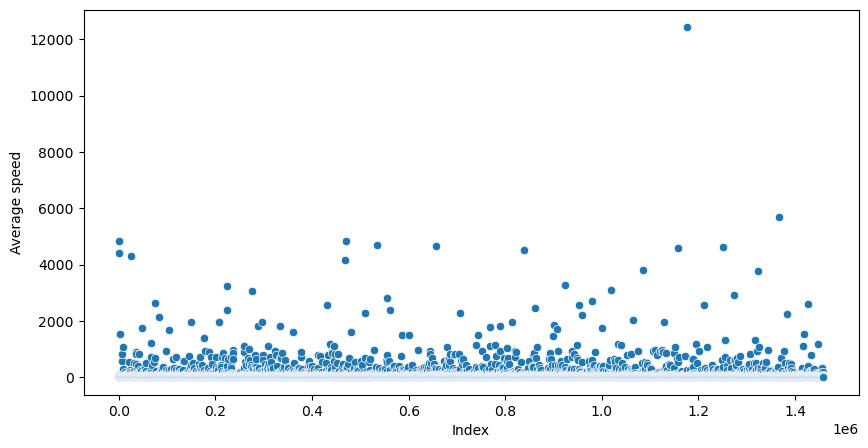

In [52]:
avg_speed = taxi_data['total_distance'] / taxi_data['trip_duration'] * 3.6
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(x=avg_speed.index, y=avg_speed, ax=ax)
ax.set_xlabel('Index')
ax.set_ylabel('Average speed');

Как раз отсюда мы видим, что у нас есть “поездки-телепортации”, для которых средняя скорость более 1000 км/ч. Даже есть такая, средняя скорость которой составляла более 12000 км/ч! 

Давайте условимся, что предельная средняя скорость, которую могут развивать таксисты будет 300 км/ч. 


### Задание 2.11.
Найдите поездки, длительность которых превышает 24 часа. И удалите их из набора данных.

а) Сколько выбросов по признаку длительности поездки вам удалось найти?

Найдите поездки, средняя скорость которых по кратчайшему пути превышает 300 км/ч и удалите их из данных. 

б) Сколько выбросов по признаку скорости вам удалось найти?

In [53]:
# ваш код здесь
day = 86400 # 24 часа = 86400 секунд
trip_duration_outliers = sum(taxi_data['trip_duration'] > day)
print(f'В датасете содержится {trip_duration_outliers} поездки, длительность которых превышает 24 часа')

В датасете содержится 4 поездки, длительность которых превышает 24 часа


In [54]:
# ваш код здесь
# удалим поездки, длительность которых более 24 часов
taxi_data = taxi_data[taxi_data['trip_duration'] <= day]

In [55]:
# ваш код здесь
avg_speed_outliers = sum(avg_speed > 300)
print(f'В датасете содержится {avg_speed_outliers} поездок, скорость которых превышает 300 км/ч')

В датасете содержится 407 поездок, скорость которых превышает 300 км/ч


In [56]:
# ваш код здесь
# удалим поездки, скорость которых превышает 300 км/ч
taxi_data = taxi_data.drop(np.where(taxi_data['total_distance'] / taxi_data['trip_duration'] * 3.6 > 300)[0])

#### Выводы
1. В датасете содержится 4 поездки, длительность которых превышает 24 часа
2. В датасете содержится 407 поездок, скорость которых превышает 300 км/ч
3. Выбросы удалены

## 3. Разведывательный анализ данных (EDA)

В этой части нашего проекта мы с вами:
* Исследуем сформированный набор данных; 
* Попробуем найти закономерности, позволяющие сформулировать предварительные гипотезы относительно того, какие факторы являются решающими в определении длительности поездки;
* Дополним наш анализ визуализациями, иллюстрирующими; исследование. Постарайтесь оформлять диаграммы с душой, а не «для галочки»: навыки визуализации полученных выводов обязательно пригодятся вам в будущем.


Начинаем с целевого признака. Забегая вперед, скажем, что основной метрикой качества решения поставленной задачи будет RMSLE - Root Mean Squared Log Error, которая вычисляется на основе целевой переменной в логарифмическом масштабе. В таком случае целесообразно сразу логарифмировать признак длительности поездки и рассматривать при анализе логарифм в качестве целевого признака:
$$trip\_duration\_log = log(trip\_duration+1),$$
где под символом log подразумевается натуральный логарифм.


In [57]:
taxi_data['trip_duration_log'] = np.log(taxi_data['trip_duration']+1)

### Задание 3.1.
Постройте гистограмму и коробчатую диаграмму длительности поездок в логарифмическом масштабе (trip_duration_log). 
Исходя из визуализации, сделайте предположение, является ли полученное распределение нормальным? 
Проверьте свою гипотезу с помощью теста Д’Агостино при уровне значимости $\alpha=0.05$. 

а) Чему равен вычисленный p-value? Ответ округлите до сотых.

б) Является ли распределение длительности поездок в логарифмическом масштабе нормальным?

C:\Users\turne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'Длительность поездки')

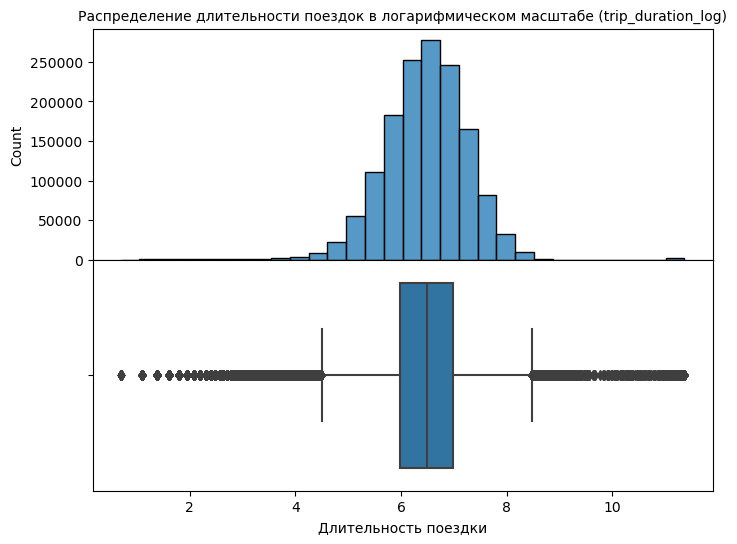

In [58]:
# ваш код здесь
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 6))
plt.subplots_adjust(hspace=.0)

histplot = sns.histplot(
    data=taxi_data, 
    x='trip_duration_log', 
    bins=30,
    ax=axes[0],
)
histplot.set_title('Распределение длительности поездок в логарифмическом масштабе (trip_duration_log)', fontsize=10)
histplot.set_xlabel('Длительность поездки')

boxplot = sns.boxplot(
    data=taxi_data,
    x='trip_duration_log',
    ax=axes[1]
)
boxplot.set_xlabel('Длительность поездки')

По визуальной картине распределение выглядит нормальным. Проверим это с помощью теста. 

In [59]:
# ваш код здесь
stats.normaltest(taxi_data['trip_duration_log'])

NormaltestResult(statistic=145621.02160983704, pvalue=0.0)

#### Выводы
1. pvalue = 0.0
2. pvalue=0.0 < a=0.05 значит мы отвергаем нулевую гипотезу, что означает, что логарифмическое распределение длительности поездки не подчиняется нормальному распределению

### Задание 3.2.
Постройте визуализацию, которая позволит сравнить распределение длительности поездки в логарифмическом масштабе (trip_duration_log) в зависимости от таксопарка (vendor_id). 

Сравните два распределения между собой.

Text(0, 0.5, 'Таксопарк')

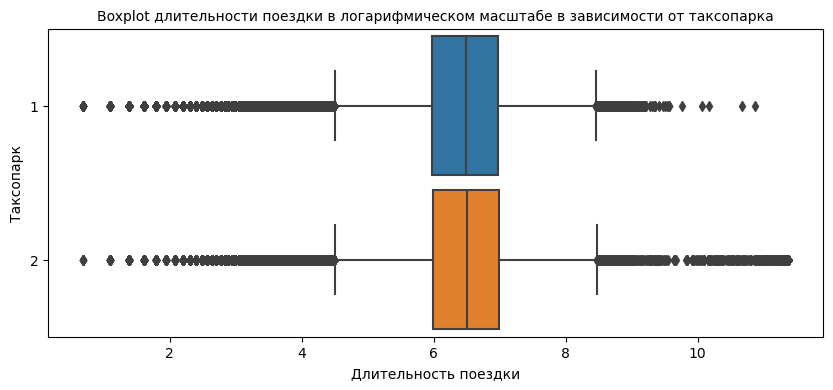

In [60]:
# ваш код здесь
fig = plt.figure(figsize=(10, 4))
boxplot = sns.boxplot(
    data=taxi_data,
    y='vendor_id',
    x='trip_duration_log',
    orient='h',
    width=0.9
)
boxplot.set_title('Boxplot длительности поездки в логарифмическом масштабе в зависимости от таксопарка', fontsize=10)
boxplot.set_xlabel('Длительность поездки')
boxplot.set_ylabel('Таксопарк')
# boxplot.grid()

#### Вывод
По визуализации распределения очень похожи, сопоставим как разброс, так и медиана.

### Задание 3.3.
Постройте визуализацию, которая позволит сравнить распределение длительности поездки в логарифмическом масштабе (trip_duration_log) в зависимости от признака отправки сообщения поставщику (store_and_fwd_flag). 

Сравните два распределения между собой.

Text(0, 0.5, 'Отправлено ли сообщение поставщику')

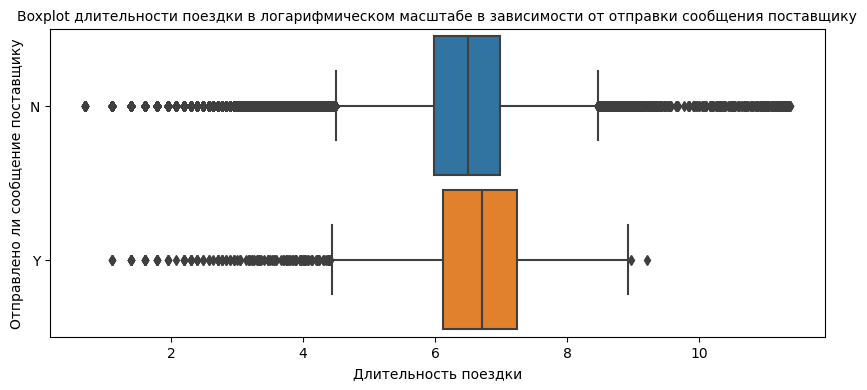

In [61]:
# ваш код здесь
fig = plt.figure(figsize=(10, 4))
boxplot = sns.boxplot(
    data=taxi_data,
    y='store_and_fwd_flag',
    x='trip_duration_log',
    orient='h',
    width=0.9
)
boxplot.set_title('Boxplot длительности поездки в логарифмическом масштабе в зависимости от отправки сообщения поставщику', fontsize=10)
boxplot.set_xlabel('Длительность поездки')
boxplot.set_ylabel('Отправлено ли сообщение поставщику')
# boxplot.grid()

Видим, что разница есть (немного отличается размах и медиана), поэтому проверим дополнительно есть ли статистическая разница

In [62]:
# ваш код здесь
taxi_data.groupby('store_and_fwd_flag')['trip_duration_log'].mean()

store_and_fwd_flag
N    6.466361
Y    6.631242
Name: trip_duration_log, dtype: float64

In [63]:
flag_yes = taxi_data[taxi_data['store_and_fwd_flag']=='Y']
flag_no = taxi_data[taxi_data['store_and_fwd_flag']=='N']
print(stats.shapiro(flag_yes['trip_duration_log']))
print(stats.shapiro(flag_no['trip_duration_log']))

ShapiroResult(statistic=0.9360359311103821, pvalue=0.0)
ShapiroResult(statistic=0.9687234163284302, pvalue=0.0)


C:\Users\turne\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [64]:
stats.mannwhitneyu(flag_yes['trip_duration_log'], flag_no['trip_duration_log'])

MannwhitneyuResult(statistic=6664605316.0, pvalue=2.167882350757972e-108)

#### Вывод
Различия в двух распределениях есть. Распределение каждой из групп отличается от нормального (на основании критериев pvalue). На основании того, что pvalue очень мальнькое (на это указывает е-108) делаем вывод, что эти различия статистически не достоверны.

### Задание 3.4.
Постройте две визуализации:
* Распределение количества поездок в зависимости от часа дня;
* Зависимость медианной длительности поездки от часа дня.

На основе построенных графиков ответьте на следующие вопросы:

а) В какое время суток такси заказывают реже всего?

б) В какое время суток наблюдается пик медианной длительности поездок?

C:\Users\turne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


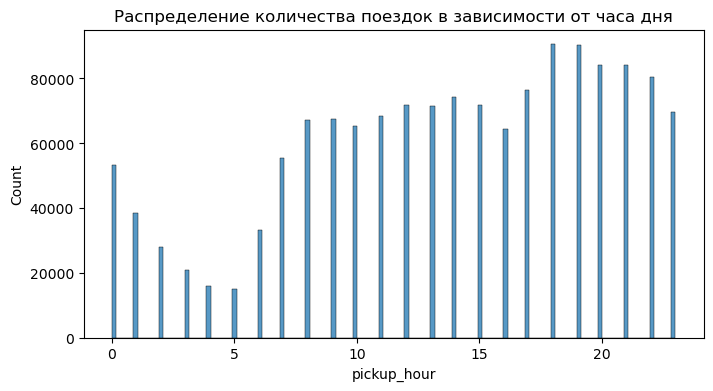

In [65]:
# ваш код здесь
plt.figure(figsize=(8,4))
sns.histplot(data=taxi_data, x='pickup_hour').set(title='Распределение количества поездок в зависимости от часа дня') 
plt.show()

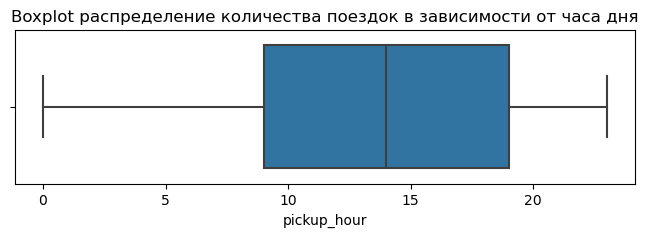

In [66]:
# ваш код здесь
plt.figure(figsize=(8,2))
sns.boxplot(data=taxi_data, x='pickup_hour').set(title='Boxplot распределение количества поездок в зависимости от часа дня')
plt.show()

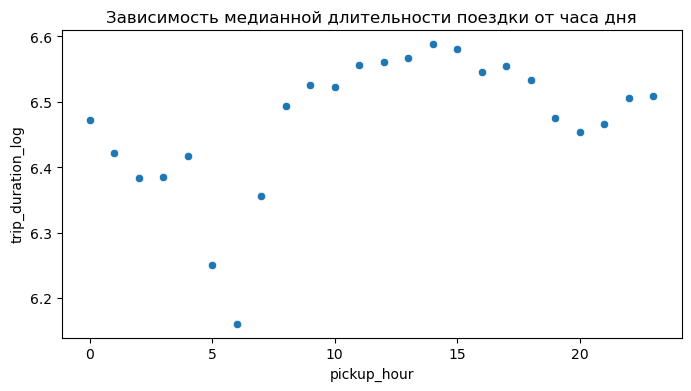

In [67]:
# ваш код здесь
pickup_hour_vs_trip_duration_log = taxi_data.groupby('pickup_hour')['trip_duration_log'].median()

plt.figure(figsize=(8,4))
sns.scatterplot(data=pickup_hour_vs_trip_duration_log).set(title='Зависимость медианной длительности поездки от часа дня')
plt.show()

#### Выводы
1. Реже всего такси заказывают в 5 утра
2. Пик медианной длительности поездок наблюдается в 14 часов

### Задание 3.5.
Постройте две визуализации:
* Распределение количества поездок в зависимости от дня недели;
*  Зависимость медианной длительности поездки от дня недели.

На основе построенных графиков ответьте на следующие вопросы:
а) В какой день недели совершается больше всего поездок?
б) В какой день недели медианная длительность поездок наименьшая?


C:\Users\turne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


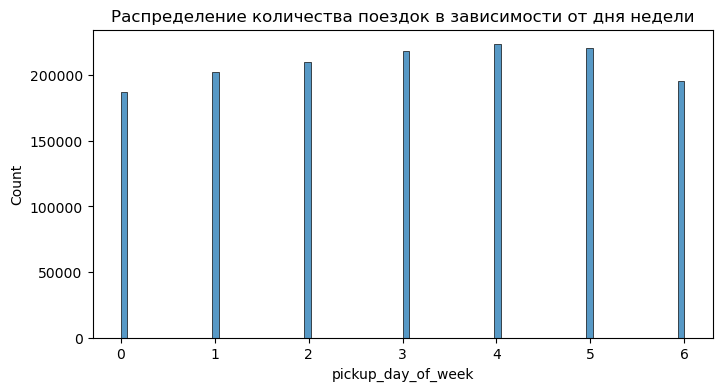

In [68]:
# ваш код здесь
plt.figure(figsize=(8,4))
sns.histplot(data=taxi_data, x='pickup_day_of_week').set(title='Распределение количества поездок в зависимости от дня недели') 
plt.show()

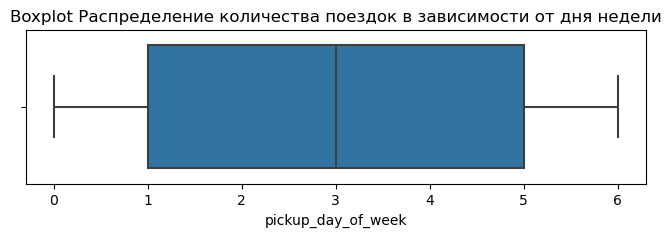

In [69]:
# ваш код здесь
plt.figure(figsize=(8,2))
sns.boxplot(data=taxi_data, x='pickup_day_of_week').set(title='Boxplot Распределение количества поездок в зависимости от дня недели')
plt.show()

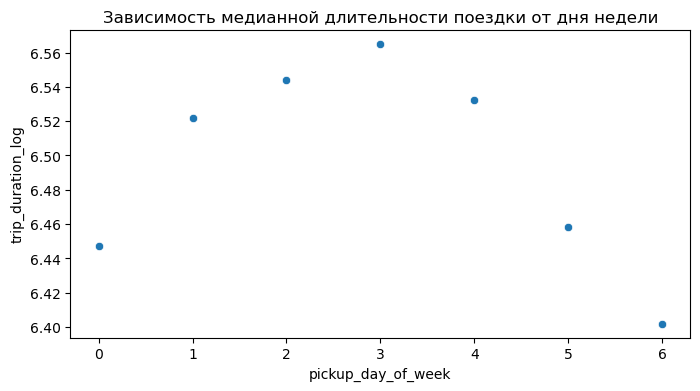

In [70]:
# ваш код здесь
#Зависимость медианной длительности поездки от дня недели

pickup_day_of_week_vs_trip_duration_log = taxi_data.groupby('pickup_day_of_week')['trip_duration_log'].median()

plt.figure(figsize=(8,4))
sns.scatterplot(data=pickup_day_of_week_vs_trip_duration_log).set(title='Зависимость медианной длительности поездки от дня недели')
plt.show()

#### Выводы
1. В пятницу (лейбл дня недели 4) совершается больше всего поездок
2. В воскресенье (лейбл дня недели 6) медианная длительность поездок наименьшая

### Задание 3.6.
Посмотрим на обе временные характеристики одновременно. 

Постройте сводную таблицу, по строкам которой отложены часы (pickup_hour), по столбцам - дни недели (pickup_day_of_week), а в ячейках - медианная длительность поездки (trip_duration). 

Визуализируйте полученную сводную таблицу с помощью тепловой карты (рекомендуемая палитра - coolwarm).

In [71]:
# ваш код здесь
df_pivot_table = taxi_data.pivot_table(index='pickup_hour',
                                       columns ='pickup_day_of_week',
                                       values='trip_duration',
                                       aggfunc=np.median)
df_pivot_table.head(24)

C:\Users\turne\AppData\Local\Temp\ipykernel_10632\2171604021.py:2: FutureWarning: The provided callable <function median at 0x00000259F5868040> is currently using DataFrameGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df_pivot_table = taxi_data.pivot_table(index='pickup_hour',


pickup_day_of_week,0,1,2,3,4,5,6
pickup_hour,,,,,,,
0,598.0,591.5,600.0,609.0,649.0,684.5,675.0
1,567.0,584.0,553.0,564.0,600.0,640.0,643.0
2,565.0,565.0,543.0,576.0,572.0,610.0,604.5
3,600.0,568.0,573.5,583.0,578.5,591.0,608.0
4,639.0,600.5,615.0,595.0,634.0,610.0,598.5
5,519.0,454.5,448.0,478.0,532.0,630.0,633.0
6,462.0,461.0,463.0,471.0,476.0,508.0,553.5
7,575.0,586.0,592.0,599.0,578.0,481.0,473.0
8,672.0,703.0,704.0,720.5,689.0,489.0,460.0


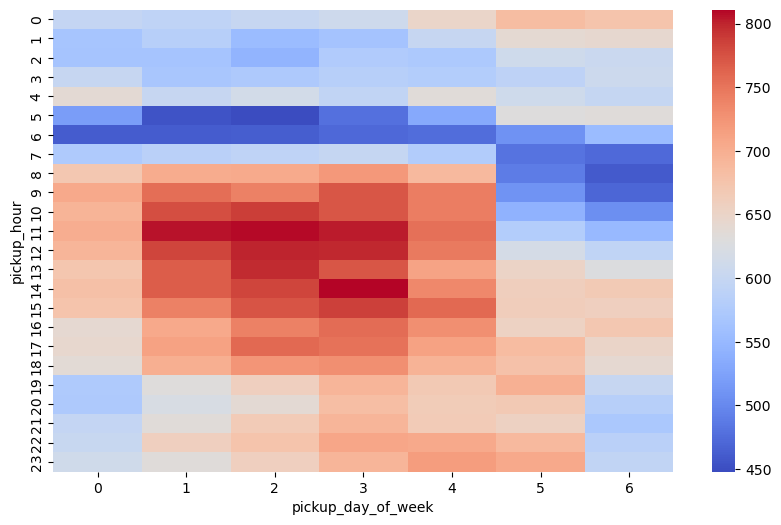

In [72]:
# ваш код здесь
plt.subplots(figsize=(10,6))
sns.heatmap(df_pivot_table, cmap=sns.color_palette("coolwarm", 10000))
plt.show()

#### Выводы
1. Построена сводная таблица, обозначающая зависимость часа поездки (pickup_hour), дней недели (pickup_day_of_week) и медианной длительности поездки (trip_duration)
2. Наибольшая длительность поездки (приближается к 800, насыщенный красный) осуществляется в 11 часов со вторника по четверг (лейбл дня недели 1-4), а также в 14 часов в четверг(лейбл дня недели 4). Наименьшая длительность поездки (синий цвет, приближается к 450) осуществляется в ранние утренние часы - 5-6 утра в рабочую неделю, а также в 8 утра в воскресенье (лейбл дня недели 6). ).

### Задание 3.7.
Постройте две диаграммы рассеяния (scatter-диаграммы):
* первая должна иллюстрировать географическое расположение точек начала поездок (pickup_longitude, pickup_latitude) 
* вторая должна географическое расположение точек завершения поездок (dropoff_longitude, dropoff_latitude).

Для этого на диаграммах по оси абсцисс отложите широту (longitude), а по оси ординат - долготу (latitude). 
Включите в визуализацию только те точки, которые находятся в пределах Нью-Йорка - добавьте следующие ограничения на границы осей абсцисс и ординат:
 
city_long_border = (-74.03, -73.75)

city_lat_border = (40.63, 40.85)

Добавьте на диаграммы расцветку по десяти географическим кластерам (geo_cluster), которые мы сгенерировали ранее. 

**Рекомендация:** для наглядности уменьшите размер точек на диаграмме рассеяния.  


In [73]:
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)

# ваш код здесь
new_work_pickup = taxi_data.loc[(taxi_data['pickup_latitude']>=40.63) & (taxi_data['pickup_latitude']<=40.85) & (taxi_data['pickup_longitude']>=-74.03) & (taxi_data['pickup_longitude']<=-73.75)]

C:\Users\turne\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


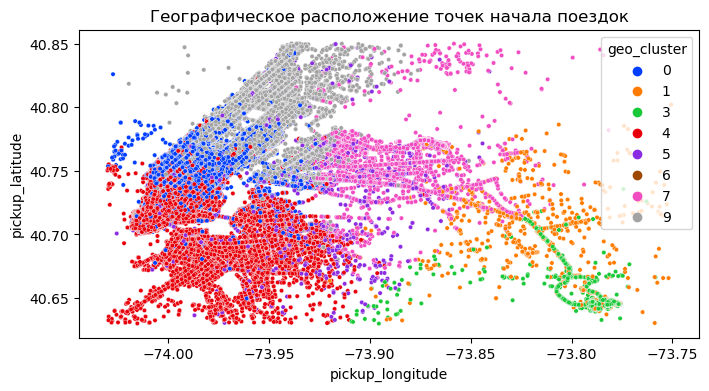

In [74]:
# ваш код здесь
plt.figure(figsize=(8,4))
sns.scatterplot(data=new_work_pickup, x='pickup_longitude', y='pickup_latitude', hue='geo_cluster', palette='bright', s=10).set(title='Географическое расположение точек начала поездок')
plt.show()

In [76]:
# ваш код здесь
new_work_dropoff = taxi_data.loc[(taxi_data['dropoff_latitude']>=40.63) & (taxi_data['dropoff_latitude']<=40.85) & (taxi_data['dropoff_longitude']>=-74.03) & (taxi_data['dropoff_longitude']<=-73.75)]

C:\Users\turne\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


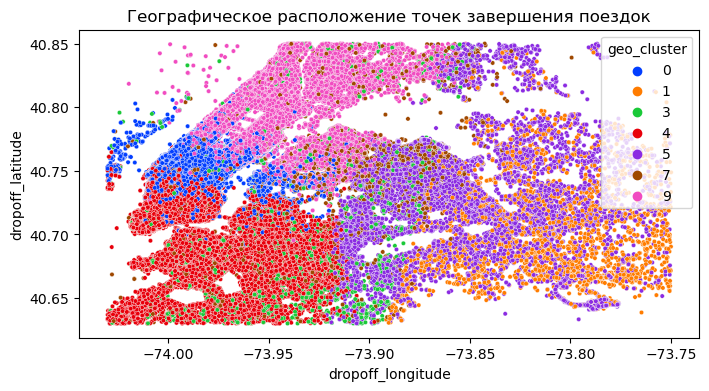

In [77]:
# ваш код здесь
plt.figure(figsize=(8,4))
sns.scatterplot(data=new_work_dropoff, x='dropoff_longitude', y='dropoff_latitude', hue='geo_cluster', palette='bright', s=10).set(title='Географическое расположение точек завершения поездок')
plt.show()

## 4. Отбор и преобразование признаков

Перед тем как перейти к построению модели, осталось сделать ещё несколько шагов.
* Следует помнить, что многие алгоритмы машинного обучения не могут обрабатывать категориальные признаки в их обычном виде. Поэтому нам необходимо их закодировать;
* Надо отобрать признаки, которые мы будем использовать для обучения модели;
*  Необходимо масштабировать и трансформировать некоторые признаки для того, чтобы улучшить сходимость моделей, в основе которых лежат численные методы.


In [78]:
print('Shape of data: {}'.format(taxi_data.shape))
print('Columns: {}'.format(taxi_data.columns))

Shape of data: (1458233, 27)
Columns: Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_date', 'pickup_hour', 'pickup_day_of_week',
       'pickup_holiday', 'total_distance', 'total_travel_time',
       'number_of_steps', 'haversine_distance', 'direction', 'geo_cluster',
       'temperature', 'visibility', 'wind speed', 'precip', 'events',
       'trip_duration_log'],
      dtype='object')


Для удобства работы сделаем копию исходной таблицы с поездками:

In [79]:
train_data = taxi_data.copy()
train_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,number_of_steps,haversine_distance,direction,geo_cluster,temperature,visibility,wind speed,precip,events,trip_duration_log
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,5.0,1.498521,99.970196,9,4.4,8.0,27.8,0.3,None,6.122493
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,6.0,1.805507,-117.153768,4,28.9,16.1,7.4,0.0,None,6.498282
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,16.0,6.385098,-159.680165,4,-6.7,16.1,24.1,0.0,None,7.661527
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,4.0,1.485498,-172.737700,4,7.2,16.1,25.9,0.0,None,6.063785
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,5.0,1.188588,179.473585,9,9.4,16.1,9.3,0.0,None,6.077642


### Задание 4.1.
Сразу позаботимся об очевидных неинформативных и избыточных признаках. 

а) Какой из признаков является уникальным для каждой поездки и не несет полезной информации в определении ее продолжительности?

б) Утечка данных (data leak) - это…

в) Подумайте, наличие какого из признаков в обучающем наборе данных создает утечку данных?

г) Исключите выбранные в пунктах а) и в) признаки из исходной таблицы с данными. Сколько столбцов в таблице у вас осталось?


#### Выводы
1. Какой из признаков является уникальным для каждой поездки и не несет полезной информации в определении ее продолжительности? - признак id
2. В машинном обучении под утечкой данных понимают ситуацию, когда один или несколько входных признаков, использующихся в процессе обучения модели, оказываются недоступными при ее практическом применении. Результатом утечки данных является ухудшение точности модели относительно ее оценки, полученной на тестовых данных.
3. Подумайте, наличие какого из признаков в обучающем наборе данных создает утечку данных? - признаки id, store_and_fwd_flag, passenger_count, dropoff_datetime

In [80]:
# ваш код здесь
train_data.drop(['id', 'passenger_count', 'dropoff_datetime'], axis=1, inplace=True)
train_data.shape

(1458233, 24)

Ранее мы извлекли всю необходимую для нас информацию из даты начала поездки, теперь мы можем избавиться от этих признаков, так как они нам больше не понадобятся:


In [81]:
drop_columns = ['pickup_datetime', 'pickup_date']
train_data = train_data.drop(drop_columns, axis=1)
print('Shape of data:  {}'.format(train_data.shape))

Shape of data:  (1458233, 22)


### Задание 4.2.

Закодируйте признак vendor_id в таблице train_data таким образом, чтобы он был равен 0, если идентификатор таксопарка равен 1, и 1 — в противном случае.

Закодируйте признак store_and_fwd_flag в таблице train_data таким образом, чтобы он был равен 0, если флаг выставлен в значение 'N', и 1 — в противном случае.

а) Рассчитайте среднее по закодированному столбцу vendor_id. Ответ приведите с точностью до сотых.

б) Рассчитайте среднее по закодированному столбцу store_and_fwd_flag. Ответ приведите с точностью до тысячных.



In [82]:
# ваш код здесь
train_data['vendor_id'].replace([1,2], [0,1],inplace=True)
train_data['store_and_fwd_flag'].replace(['N','Y'], [0,1],inplace=True)

In [83]:
# ваш код здесь
vendor_id_mean = round(train_data['vendor_id'].mean(), 2)
store_and_fwd_flag_mean = round(train_data['store_and_fwd_flag'].mean(), 3)
print(f'Cреднее по закодированному столбцу vendor_id {vendor_id_mean}')
print(f'Cреднее по закодированному столбцу store_and_fwd_flag {store_and_fwd_flag_mean}')

Cреднее по закодированному столбцу vendor_id 0.53
Cреднее по закодированному столбцу store_and_fwd_flag 0.006


#### Выводы
1. Перекодированы бинарные признаки vendor_id, store_and_fwd_flag
2. Cреднее по закодированному столбцу vendor_id 0.53
3. 
Cреднее по закодированному столбцу store_and_fwd_flag 0.006

### Задание 4.3.
Создайте таблицу data_onehot из закодированных однократным кодированием признаков pickup_day_of_week, geo_cluster и events в таблице train_data с помощью OneHotEncoder из библиотеки sklearn. Параметр drop выставите в значение 'first', чтобы удалять первый бинарный столбец, тем самым не создавая излишних признаков.

В параметре handle_unknown установите значение 'ignore'. Это позволит коду отработать без ошибок в случае появления в тестовой выборке значений, отсутствующих в обучающей выборке.

В результате работы OneHotEncoder вы получите безымянный numpy-массив, который нам будет необходимо преобразовать обратно в DataFrame, для более удобной работы в дальнейшем. Чтобы получить имена закодированных столбцов у объекта типа OneHotEncoder есть специальный метод get_feature_names_out(). Он возвращает список новых закодированных имен столбцов в формате <оригинальное имя столбца>_<имя категории>.

Пример использования:

``` python
# Объявляем кодировщик
one_hot_encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
# Получаем закодированные имена столбцов
column_names = one_hot_encoder.get_feature_names_out()
# Составляем DataFrame из закодированных признаков
data_onehot = pd.DataFrame(data_onehot, columns=column_names)
```

В этом псевдокоде:
* one_hot_encoder - объект класса OneHotEncoder
* data_onehot - numpy-массив, полученный в результате трансформации кодировщиком

В результате выполнения задания у вас должен быть образован DataFrame `data_onehot`, который содержит кодированные категориальные признаки pickup_day_of_week, geo_cluster и events. 


Сколько бинарных столбцов у вас получилось сгенерировать с помощью однократного кодирования?


In [84]:
# ваш код здесь
# выделяем отдельно столбцы, которые нужно перекодировать
data_cat_column = train_data[['pickup_day_of_week', 'geo_cluster', 'events']]
data_cat_column.head() # проверка

,pickup_day_of_week,geo_cluster,events
0,0,9,None
1,6,4,None
2,1,4,None
3,2,4,None
4,5,9,None


In [85]:
# ваш код здесь
# Объявляем кодировщик и преобразуем категориальные столбцы
from sklearn. preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
data_onehot = pd.DataFrame(one_hot_encoder.fit_transform(data_cat_column[['pickup_day_of_week', 'geo_cluster', 'events']]). toarray ())
# Получаем закодированные имена столбцов
column_names = one_hot_encoder.get_feature_names_out()
# добавляем названия столбцов в датафрейм
data_onehot.columns = column_names

In [86]:
# ваш код здесь
data_onehot.head() # проверка

,pickup_day_of_week_1,pickup_day_of_week_2,pickup_day_of_week_3,pickup_day_of_week_4,pickup_day_of_week_5,pickup_day_of_week_6,geo_cluster_1,geo_cluster_2,geo_cluster_3,geo_cluster_4,geo_cluster_5,geo_cluster_6,geo_cluster_7,geo_cluster_8,geo_cluster_9,events_None,events_Rain,events_Snow
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [87]:
# ваш код здесь
data_onehot.shape

(1458233, 18)

In [88]:
# ваш код здесь
data_onehot.info() # проверка

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458233 entries, 0 to 1458232
Data columns (total 18 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   pickup_day_of_week_1  1458233 non-null  float64
 1   pickup_day_of_week_2  1458233 non-null  float64
 2   pickup_day_of_week_3  1458233 non-null  float64
 3   pickup_day_of_week_4  1458233 non-null  float64
 4   pickup_day_of_week_5  1458233 non-null  float64
 5   pickup_day_of_week_6  1458233 non-null  float64
 6   geo_cluster_1         1458233 non-null  float64
 7   geo_cluster_2         1458233 non-null  float64
 8   geo_cluster_3         1458233 non-null  float64
 9   geo_cluster_4         1458233 non-null  float64
 10  geo_cluster_5         1458233 non-null  float64
 11  geo_cluster_6         1458233 non-null  float64
 12  geo_cluster_7         1458233 non-null  float64
 13  geo_cluster_8         1458233 non-null  float64
 14  geo_cluster_9         1458233 non-

Добавим полученную таблицу с закодированными признаками:

In [89]:
train_data = pd.concat(
    [train_data.reset_index(drop=True).drop(['pickup_day_of_week', 'geo_cluster', 'events'], axis=1), data_onehot], 
    axis=1
)
print('Shape of data: {}'.format(train_data.shape))

Shape of data: (1458233, 37)


In [90]:
train_data.info() # проверка

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458233 entries, 0 to 1458232
Data columns (total 37 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   vendor_id             1458233 non-null  int64  
 1   pickup_longitude      1458233 non-null  float64
 2   pickup_latitude       1458233 non-null  float64
 3   dropoff_longitude     1458233 non-null  float64
 4   dropoff_latitude      1458233 non-null  float64
 5   store_and_fwd_flag    1458233 non-null  int64  
 6   trip_duration         1458233 non-null  int64  
 7   pickup_hour           1458233 non-null  int32  
 8   pickup_holiday        1458233 non-null  int64  
 9   total_distance        1458233 non-null  float64
 10  total_travel_time     1458233 non-null  float64
 11  number_of_steps       1458233 non-null  float64
 12  haversine_distance    1458233 non-null  float64
 13  direction             1458233 non-null  float64
 14  temperature           1458233 non-

Теперь, когда категориальные признаки предобработаны, сформируем матрицу наблюдений X, вектор целевой переменной y и его логарифм y_log. В матрицу наблюдений войдут все столбцы из таблицы с поездками за исключением целевого признака trip_duration и его логарифмированной версии trip_duration_log:


In [91]:
X = train_data.drop(['trip_duration', 'trip_duration_log'], axis=1)
y = train_data['trip_duration']
y_log = train_data['trip_duration_log']

Все наши модели мы будем обучать на логарифмированной версии y_log. 

Выбранный тип валидации - hold-out. Разобьем выборку на обучающую и валидационную в соотношении 67/33:

In [92]:
X_train, X_valid, y_train_log, y_valid_log = model_selection.train_test_split(
    X, y_log, 
    test_size=0.33, 
    random_state=42
)

На данный момент у нас достаточно много признаков: скорее всего, не все из них будут важны. Давайте оставим лишь те, которые сильнее всего связаны с целевой переменной и точно будут вносить вклад в повышение качества модели.


#### Выводы
1. Преобразованы категориальные признаки pickup_day_of_week', 'geo_cluster', 'events с помощью One_Hot_Encoding
2. C помощью OneHotEncoder получили 18 столбцов. Проверили, что первый столбец каждого признака действительно удален.
3. Разбил выборку на трейн и тест.

### Задание 4.4.
С помощью SelectKBest отберите 25 признаков, наилучшим образом подходящих для предсказания целевой переменной в логарифмическом масштабе. Отбор реализуйте по обучающей выборке, используя параметр score_func = f_regression.

Укажите признаки, которые вошли в список отобранных


In [93]:
# ваш код здесь
# проверяем сколько признаков содержится в текущей обучающей выборке
print('Количество признаков в текущей обучающей выборке', X_train.shape[1])

Количество признаков в текущей обучающей выборке 35


In [94]:
# ваш код здесь
# обучим SelectKBest и преобразуем обучающую выборку, выберем 25 признаков
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

select = SelectKBest(score_func=f_regression, k=25)
z = select.fit_transform(X_train, y_train_log)  
print('После выбора 25 лучших признаков', z.shape[1]) 

После выбора 25 лучших признаков 25


In [95]:
# ваш код здесь
# посмотрим какие лучшие признаки выбрал алгоритм
filter_features = select.get_feature_names_out()
features_original = X_train.columns.tolist() 
 
print('Признаки в изначальном обучающем наборе')
print(features_original)

Признаки в изначальном обучающем наборе
['vendor_id', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag', 'pickup_hour', 'pickup_holiday', 'total_distance', 'total_travel_time', 'number_of_steps', 'haversine_distance', 'direction', 'temperature', 'visibility', 'wind speed', 'precip', 'pickup_day_of_week_1', 'pickup_day_of_week_2', 'pickup_day_of_week_3', 'pickup_day_of_week_4', 'pickup_day_of_week_5', 'pickup_day_of_week_6', 'geo_cluster_1', 'geo_cluster_2', 'geo_cluster_3', 'geo_cluster_4', 'geo_cluster_5', 'geo_cluster_6', 'geo_cluster_7', 'geo_cluster_8', 'geo_cluster_9', 'events_None', 'events_Rain', 'events_Snow']


In [96]:
# ваш код здесь
print('Выбранные 25 признаков')
print(filter_features)

Выбранные 25 признаков
['vendor_id' 'pickup_longitude' 'pickup_latitude' 'dropoff_longitude'
 'dropoff_latitude' 'store_and_fwd_flag' 'pickup_hour' 'pickup_holiday'
 'total_distance' 'total_travel_time' 'number_of_steps'
 'haversine_distance' 'temperature' 'visibility' 'pickup_day_of_week_1'
 'pickup_day_of_week_2' 'pickup_day_of_week_3' 'pickup_day_of_week_4'
 'pickup_day_of_week_5' 'pickup_day_of_week_6' 'geo_cluster_1'
 'geo_cluster_3' 'geo_cluster_5' 'geo_cluster_7' 'geo_cluster_9']


In [194]:
# преобразуем трейн так, чтобы в нем остались только выбранные 25 признаков
X_train = X_train[filter_features]

In [196]:
X_train.info() # проверка

<class 'pandas.core.frame.DataFrame'>
Index: 977016 entries, 293850 to 121958
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   vendor_id             977016 non-null  int64  
 1   pickup_longitude      977016 non-null  float64
 2   pickup_latitude       977016 non-null  float64
 3   dropoff_longitude     977016 non-null  float64
 4   dropoff_latitude      977016 non-null  float64
 5   store_and_fwd_flag    977016 non-null  int64  
 6   pickup_hour           977016 non-null  int32  
 7   pickup_holiday        977016 non-null  int64  
 8   total_distance        977016 non-null  float64
 9   total_travel_time     977016 non-null  float64
 10  number_of_steps       977016 non-null  float64
 11  haversine_distance    977016 non-null  float64
 12  temperature           977016 non-null  float64
 13  visibility            977016 non-null  float64
 14  pickup_day_of_week_1  977016 non-null  float64
 15  

In [197]:
# преобразуем валидационную выборку так, чтобы в ней остались только выбранные 25 признаков
X_valid = X_valid[filter_features]
X_valid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 481217 entries, 452652 to 1108352
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   vendor_id             481217 non-null  int64  
 1   pickup_longitude      481217 non-null  float64
 2   pickup_latitude       481217 non-null  float64
 3   dropoff_longitude     481217 non-null  float64
 4   dropoff_latitude      481217 non-null  float64
 5   store_and_fwd_flag    481217 non-null  int64  
 6   pickup_hour           481217 non-null  int32  
 7   pickup_holiday        481217 non-null  int64  
 8   total_distance        481217 non-null  float64
 9   total_travel_time     481217 non-null  float64
 10  number_of_steps       481217 non-null  float64
 11  haversine_distance    481217 non-null  float64
 12  temperature           481217 non-null  float64
 13  visibility            481217 non-null  float64
 14  pickup_day_of_week_1  481217 non-null  float64
 15 

#### Выводы
1. С помощью SelectKBest выбрали 25 признаков, которые наиболее важны для построения модели 

Так как мы будем использовать различные модели, в том числе внутри которых заложены численные методы оптимизации, то давайте заранее позаботимся о масштабировании факторов. 


### Задание 4.5.
Нормализуйте предикторы в обучающей и валидационной выборках с помощью MinMaxScaler из библиотеки sklearn. Помните, что обучение нормализатора производится на обучающей выборке, а трансформация на обучающей и валидационной!

Рассчитайте среднее арифметическое для первого предиктора (т. е. для первого столбца матрицы) из валидационной выборки. Ответ округлите до сотых.


In [198]:
# ваш код здесь
from sklearn.preprocessing import MinMaxScaler
# инициализируем стандартизатор
scaler = MinMaxScaler()
# подгоняем параметры стандартизатора (вычисляем среднее и СКО)
scaler.fit(X_train)
# производим стандартизацию обучающей выборки
X_train_scaled = scaler.transform(X_train)
# производим стандартизацию валидационной выборки
X_valid_scaled = scaler.transform(X_valid)

In [199]:
# ваш код здесь
first_column_mean = round(X_valid_scaled[0].mean(), 2)
print(f'Cреднее арифметическое для первого предиктора валидационной выборки {first_column_mean}')

Cреднее арифметическое для первого предиктора валидационной выборки 0.28


#### Выводы
1. Произведено масштабирование обучающей и валидационной выборки
2. Cреднее арифметическое для первого предиктора валидационной выборки 0.28

## 5. Решение задачи регрессии: линейная регрессия и деревья решений

Определим метрику, по которой мы будем измерять качество наших моделей. Мы будем следовать канонам исходного соревнования на Kaggle и в качестве метрики использовать RMSLE (Root Mean Squared Log Error), которая вычисляется как:
$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^n(log(y_i+1)-log(\hat{y_i}+1))^2},$$
где:
* $y_i$ - истинная длительность i-ой поездки на такси (trip_duration)
* $\hat{y_i}$- предсказанная моделью длительность i-ой поездки на такси

Заметим, что логарифмирование целевого признака мы уже провели заранее, поэтому нам будет достаточно вычислить метрику RMSE для модели, обученной прогнозировать длительность поездки такси в логарифмическом масштабе:
$$z_i=log(y_i+1),$$
$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^n(z_i-\hat{z_i})^2}=\sqrt{MSE(z_i,\hat{z_i})}$$ 



### Задание 5.1.
Постройте модель линейной регрессии на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию.

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [200]:
# ваш код здесь
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 

# создаем модель линейной регрессии
lr_model = LinearRegression()
# обучаем на трейне, сразу подаем логарифмированный таргет
lr_model.fit(X_train_scaled, y_train_log)
# делаем предсказания на валидации
y_pred = lr_model.predict(X_valid_scaled)
# делаем предсказания на трейне (так как по заданию мы должны рассчитать метрику качества)
y_train_pred = lr_model.predict(X_train_scaled)

# расчитаем метрики качества
rmse_train = mean_squared_error(y_train_log, y_train_pred, squared=False)
rmse_valid = mean_squared_error(y_valid_log, y_pred, squared=False)

print('Train RMSE = %.2f' % rmse_train)
print('Valid RMSE = %.2f' % rmse_valid)

Train RMSE = 0.54
Valid RMSE = 0.54


#### Выводы
1. Обучена модель линейной регресии на масштабированной выборке и с использованием логарифмированного таргета
2. Метрика качества логарифмированная RMSE (так как использовали логарифмированный таргет), метрики качества совпадают на трейне и валидации и составляют 0.54, что является достаточно хорошим показателем

### Задание 5.2.
Сгенерируйте полиномиальные признаки 2-ой степени с помощью PolynomialFeatures из библиотеки sklearn. Параметр include_bias выставите в значение False.

Постройте модель полиномиальной регрессии 2-ой степени на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию.

а) Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.

б) Наблюдаются ли у вашей модели признаки переобучения?


In [201]:
# ваш код здесь
from sklearn.preprocessing import PolynomialFeatures
# создаём генератор полиномиальных признаков
poly = PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_train_scaled)

PolynomialFeatures(include_bias=False)

In [202]:
# генерируем полиномиальные признаки для трейна
X_train_scaled_poly = poly.transform(X_train_scaled)

In [203]:
# генерируем полиномиальные признаки для валидации
X_valid_scaled_poly = poly.transform(X_valid_scaled)

In [204]:
# создаем модель, в которую подаем полиномиальные шкалированные данные
poly_model = LinearRegression()
# обучаем на трейне, подаем полиномиальные данные
poly_model.fit(X_train_scaled_poly, y_train_log)

LinearRegression()

In [205]:
# делаем предсказания на валидации
y_pred_poly = poly_model.predict(X_valid_scaled_poly)

In [206]:
# делаем предсказания на трейне (так как по заданию мы должны рассчитать метрику качества)
y_train_pred_poly = poly_model.predict(X_train_scaled_poly)

In [207]:
# расчитаем метрики качества
rmse_train_poly = mean_squared_error(y_train_log, y_train_pred_poly, squared=False)
rmse_valid_poly = mean_squared_error(y_valid_log, y_pred_poly, squared=False)

print('Train RMSE poly = %.2f' % rmse_train_poly)
print('Valid RMSE poly = %.2f' % rmse_valid_poly)

Train RMSE poly = 0.47
Valid RMSE poly = 0.75


#### Выводы
1. Метрики качества: Train RMSE = 0.47, Valid RMSE = 0.75
2. Это явно свидетельствует о переобучении модели

### Задание 5.3.
Постройте модель полиномиальной регрессии 2-ой степени с L2-регуляризацией (регуляризация по Тихонову) на обучающей выборке  (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Коэффициент регуляризации $\alpha$ установите равным 1, остальные параметры оставьте по умолчанию.

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [208]:
# ваш код здесь
# создаем модель линейной регрессии с L2-регуляризацией, в которую подаем полиномиальные шкалированные данные
from sklearn.linear_model import Ridge

ridge_lr_poly = linear_model.Ridge(alpha=1)
# обучаем модель
ridge_lr_poly.fit(X_train_scaled_poly, y_train_log)

Ridge(alpha=1)

In [209]:
# делаем предсказание для валидационной выборки
y_pred_poly_ridge = ridge_lr_poly.predict(X_valid_scaled_poly)

In [210]:
# делаем предсказания на трейне (так как по заданию мы должны рассчитать метрику качества)
y_train_pred_poly_ridge = ridge_lr_poly.predict(X_train_scaled_poly)

In [211]:
# расчитаем метрики качества
rmse_train_poly_ridge = mean_squared_error(y_train_log, y_train_pred_poly_ridge, squared=False)
rmse_valid_poly_ridge = mean_squared_error(y_valid_log, y_pred_poly_ridge, squared=False)

print('Train RMSE poly ridge = %.2f' % rmse_train_poly_ridge)
print('Valid RMSE poly ridge = %.2f' % rmse_valid_poly_ridge)

Train RMSE poly ridge = 0.48
Valid RMSE poly ridge = 0.48


#### Выводы
1. Метрики качества Train RMSE poly ridge = 0.48, Valid RMSE poly ridge = 0.48
2. На текущий момент это самые лучшие метрики качества. Применив регуляризацию на полиномиальные признаки мы избавились от переобучения и получили хорошие метрики качества. 

### Задание 5.4.
Постройте модель дерева решений (DecisionTreeRegressor) на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию. 

а) Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.

б) Наблюдаются ли у вашей модели признаки переобучения?


In [212]:
# ваш код здесь
# создаем модель дерева решений
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
# обучаем модель
dt.fit(X_train_scaled, y_train_log)

DecisionTreeRegressor()

In [213]:
# делаем предсказание для валидационной выборки
y_pred_dt = dt.predict(X_valid_scaled)

In [214]:
# делаем предсказания на трейне (так как по заданию мы должны рассчитать метрику качества)
y_train_pred_dt = dt.predict(X_train_scaled)

In [215]:
# расчитаем метрики качества
rmse_train_dt = mean_squared_error(y_train_log, y_train_pred_dt, squared=False)
rmse_valid_dt = mean_squared_error(y_valid_log, y_pred_dt, squared=False)

print('Train RMSE dt = %.3f' % rmse_train_dt)
print('Valid RMSE dt = %.2f' % rmse_valid_dt)

Train RMSE dt = 0.003
Valid RMSE dt = 0.57


#### Выводы
1. Метрики качества Train RMSE dt = 0.00, Valid RMSE dt = 0.57
2. Метрики свидетельствуют о переобучении модели, это вполне предсказуемо, так как деревья решений склонны к переобучению

### Задание 5.5.
Переберите все возможные варианты глубины дерева решений в диапазоне от 7 до 20:

max_depths = range(7, 20)

Параметр random_state задайте равным 42.

Постройте линейные графики изменения метрики RMSE на тренировочной и валидационной выборках в зависимости от значения параметра глубины дерева решений. 

а) Найдите оптимальное значение максимальной глубины дерева, для которой будет наблюдаться минимальное значение RMSLE на обучающей выборке, но при этом еще не будет наблюдаться переобучение (валидационная кривая еще не начинает возрастать).

б) Чему равно значение метрик RMSLE на тренировочной и валидационной выборках для дерева решений с выбранной оптимальной глубиной? Ответ округлите до сотых.


In [216]:
# ваш код здесь
# объявим модель
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

model = DecisionTreeRegressor(random_state=42)
# подберем параметры, которые будем подбирать
max_depths = range(7, 20)
params = {'max_depth': max_depths}
# подбираем гиперпараметры с помощью GridSearch
grid_search = GridSearchCV(estimator=model, param_grid=params, scoring='neg_root_mean_squared_error')

In [217]:
# обучаем
grid_search.fit(X_train_scaled, y_train_log)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': range(7, 20)},
             scoring='neg_root_mean_squared_error')

In [239]:
# получаем лучшую модель
best_model = grid_search.best_estimator_
# делаем предсказание на валидации
y_pred_best_model = best_model.predict(X_valid_scaled)

In [240]:
# делаем предсказание на трейне
y_pred_train_best_model = best_model.predict(X_train_scaled)
# gолучение лучших параметров DecisionTreeRegressor
DecisionTreeRegressor_best_params = grid_search.best_params_
print("DecisionTreeRegressor_best_params: ", DecisionTreeRegressor_best_params)
# расчитаем метрики качества
rmse_train_dt_best_param = mean_squared_error(y_train_log, y_pred_train_best_model, squared=False)
rmse_valid_dt_best_param = mean_squared_error(y_valid_log, y_pred_best_model, squared=False)

print('Train RMSE dt_best_param = %.2f' % rmse_train_dt_best_param)
print('Valid RMSE dt_best_param = %.2f' % rmse_valid_dt_best_param)

DecisionTreeRegressor_best_params:  {'max_depth': 11}
Train RMSE dt_best_param = 0.42
Valid RMSE dt_best_param = 0.43


In [241]:
train_RMSE = []
valid_RMSE = []
max_depths = list(np.arange(7, 20, 1))

for depth in max_depths:
    model = DecisionTreeRegressor(random_state=42)
    params = {'max_depth': [depth]}
    grid_search = GridSearchCV(estimator=model, param_grid=params, scoring='neg_root_mean_squared_error')
    grid_search.fit(X_train_scaled, y_train_log)
    y_pred_train = grid_search.predict(X_train_scaled)
    y_pred_valid = grid_search.predict(X_valid_scaled)

    train_RMSE.append(mean_squared_error(y_train_log, y_pred_train, squared=False))
    valid_RMSE.append(mean_squared_error(y_valid_log, y_pred_valid, squared=False))

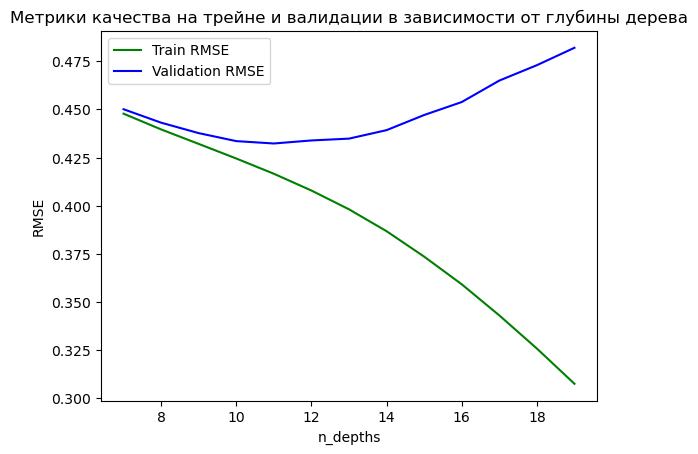

In [242]:
# построим график
line1, = plt.plot(max_depths, train_RMSE, color="g", label="Train RMSE")
line2, = plt.plot(max_depths, valid_RMSE, color="b", label="Validation RMSE")

plt.legend(handles=[line1, line2])
plt.title('Метрики качества на трейне и валидации в зависимости от глубины дерева')
plt.ylabel('RMSE')
plt.xlabel('n_depths')
plt.show()

In [243]:
index_max_depth = max_depths[valid_RMSE.index(np.min(valid_RMSE))]
print(f'Оптимальная глубина дерева {index_max_depth}')

Оптимальная глубина дерева 11


#### Выводы
1. Оптимальная глубина дерева 11
2. Метрики качества: Train RMSE dt_best_param = 0.42, Valid RMSE dt_best_param = 0.43.
3. Данная модель показывает лучшие результаты. Переобучение начинается, если увеличивать глубину дерева более 12

## 6. Решение задачи регрессии: ансамблевые методы и построение прогноза

Переходим к тяжелой артиллерии: ансамблевым алгоритмам. 

### Задание 6.1.

Постройте модель случайного леса на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). В качестве гиперпараметров укажите следующие:
* n_estimators=200,
* max_depth=12,
* criterion='squared_error',
* min_samples_split=20,
* random_state=42

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [244]:
# ваш код здесь
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=200, max_depth=12, criterion='squared_error', min_samples_split=20, random_state=42)
rf.fit(X_train_scaled, y_train_log)
y_pred_rf = rf.predict(X_valid_scaled)
y_train_pred_rf = rf.predict(X_train_scaled)

# расчитаем метрики качества
rmse_train_rf = mean_squared_error(y_train_log, y_train_pred_rf, squared=False)
rmse_valid_rf = mean_squared_error(y_valid_log, y_pred_rf, squared=False)

print('Train RMSE rf = %.2f' % rmse_train_rf)
print('Valid RMSE rf = %.2f' % rmse_valid_rf)

Train RMSE rf = 0.40
Valid RMSE rf = 0.42


#### Выводы
1. Метрики качества Train RMSE rf = 0.40, Valid RMSE rf = 0.41
2. Модель показывает еще более лучшие метрики качества

### Задание 6.2.
Постройте модель градиентного бустинга над деревьями решений (GradientBoostingRegressor) на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). В качестве гиперпараметров укажите следующие:
* learning_rate=0.5,
* n_estimators=100,
* max_depth=6, 
* min_samples_split=30,
* random_state=42

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [246]:
# ваш код здесь
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(learning_rate=0.5, n_estimators=100, max_depth=6, min_samples_split=30, random_state=42)
gb.fit(X_train_scaled, y_train_log)
y_pred_gb = gb.predict(X_valid_scaled)
y_train_pred_gb = gb.predict(X_train_scaled)

# расчитаем метрики качества
rmse_train_gb = mean_squared_error(y_train_log, y_train_pred_gb, squared=False)
rmse_valid_gb = mean_squared_error(y_valid_log, y_pred_gb, squared=False)

print('Train RMSE gb = %.2f' % rmse_train_gb)
print('Valid RMSE gb = %.2f' % rmse_valid_gb)

Train RMSE gb = 0.37
Valid RMSE gb = 0.40


#### Выводы
1. Метрики качества Train RMSE gb = 0.37, Valid RMSE gb = 0.40
2. Модель продемонстрировала хорошие метрики качества

### Задание 6.3.
Какая из построенных вами моделей показала наилучший результат (наименьшее значение RMSLE на валидационной выборке)?
* Линейная регрессия
* Полиномиальная регрессия 2ой степени
* Дерево решений
* Случайный лес
* Градиентный бустинг над деревьями решений


In [247]:
# ваш код здесь
result = pd.DataFrame({'Model': ['LinearRegression', 
                                 'LinearRegression & PolynomialFeatures', 
                                 'Ridge & PolynomialFeatures', 
                                 'DecisionTree', 
                                 'DecisionTree & GridSearch', 
                                 'RandomForest',
                                 'GradientBoosting'
                                ],
                      'Best_params': ['-', 
                                      '-', 
                                      '-',
                                      '-',
                                      DecisionTreeRegressor_best_params,
                                      '-',
                                      '-'
                                     ],
                      'RMSLE_train': [round(rmse_train, 2), 
                                      round(rmse_train_poly, 2), 
                                      round(rmse_train_poly_ridge, 2),
                                      round(rmse_train_dt, 2), 
                                      round(rmse_train_dt_best_param, 2), 
                                      round(rmse_train_rf, 2), 
                                      round(rmse_train_gb, 2) 
                                     ],
                      'RMSLE_validation': [round(rmse_valid, 2), 
                                           round(rmse_valid_poly, 2), 
                                           round(rmse_valid_poly_ridge, 2), 
                                           round(rmse_valid_dt, 2),
                                           round(rmse_valid_dt_best_param, 2),
                                           round(rmse_valid_rf, 2),
                                           round(rmse_valid_gb, 2)                  
                                          ]
                      }
                     )

result

,Model,Best_params,RMSLE_train,RMSLE_validation
0,LinearRegression,-,0.54,0.54
1,LinearRegression & PolynomialFeatures,-,0.47,0.75
2,Ridge & PolynomialFeatures,-,0.48,0.48
3,DecisionTree,-,0.00,0.57
4,DecisionTree & GridSearch,{'max_depth': 11},0.42,0.43
5,RandomForest,-,0.40,0.42
6,GradientBoosting,-,0.37,0.40


#### Выводы
1. Лучшие метрики качества продемонстрировала модель градиентного бустинга
2. Модели полиномиальной регрессии и дерева решений продемонстрировали склонность к переобучению

### Задание 6.4.
Постройте столбчатую диаграмму коэффициентов значимости каждого из факторов.

Укажите топ-3 наиболее значимых для предсказания целевого признака - длительности поездки в логарифмическом масштабе - факторов.


In [248]:
# ваш код здесь
featureImportance = pd.DataFrame({'feature': X_train.columns, 
                                  'importance': gb.feature_importances_})
sorted = featureImportance.sort_values(by=['importance'], ascending=False)
sorted

,feature,importance
8,total_distance,0.627627
9,total_travel_time,0.181549
6,pickup_hour,0.058523
11,haversine_distance,0.029607
4,dropoff_latitude,0.029079
3,dropoff_longitude,0.013569
1,pickup_longitude,0.012948
2,pickup_latitude,0.011149
19,pickup_day_of_week_6,0.008035
10,number_of_steps,0.006570


<Axes: xlabel='feature'>

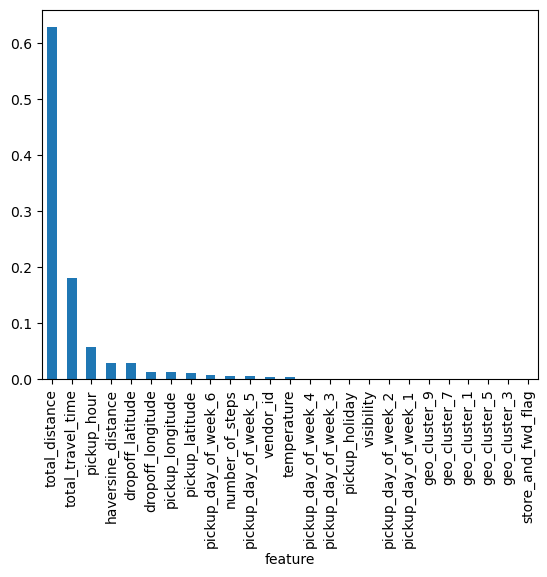

In [249]:
# ваш код здесь
featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(['importance'], ascending=False, inplace=True)
featureImportance['importance'].plot.bar()

#### Выводы
Топ-3 наиболее важных признака для прогнозирования длительности поездки: total_distance (62%), total_travel_time (18%), pickup_hour (5%)

### Задание 6.5.
Для лучшей из построенных моделей рассчитайте медианную абсолютную ошибку (MeAE - в sklearn функция median_absolute_error) предсказания длительности поездки такси на валидационной выборке:
$$ MeAE = median(|y_i-\hat{y_i}|)$$

Значение метрики MeAE переведите в минуты и округлите до десятых.


In [333]:
# ваш код здесь
from sklearn.metrics import median_absolute_error
# переводим из логарифмического масштаба в обычный
y_valid = np.exp(y_valid_log) - 1
y_valid_pred = np.exp(y_pred_gb) - 1

meae_valid_gb = round(median_absolute_error(y_valid, y_valid_pred)/60, 1)

print('Valid MeAE gb = %.1f' % meae_valid_gb)

Valid MeAE gb = 1.8


Финальный шаг - сделать submit -  предсказание для отложенного тестового набора данных. 

Прочитаем тестовые данные и заранее выделим столбец с идентификаторами поездок из тестового набора данных. Он нам еще пригодится:


In [270]:
test_data = pd.read_csv("test.csv")
test_data.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


In [271]:
osrm_data_test = pd.read_csv("Project5_osrm_data_test.csv")

In [273]:
osrm_data_test = osrm_data_test[['id', 'total_distance', 'total_travel_time', 'number_of_steps']]

In [275]:
test_id = test_data['id']
test_id.head()

0    id3004672
1    id3505355
2    id1217141
3    id2150126
4    id1598245
Name: id, dtype: object

Перед созданием прогноза для тестовой выборки необходимо произвести все манипуляции с данными, которые мы производили с тренировочной выборкой, а именно:
* Перевести признак pickup_datetime в формат datetime;
* Добавить новые признаки (временные, географические, погодные и другие факторы);
* Произвести очистку данных от пропусков;
* Произвести кодировку категориальных признаков:
    * Закодировать бинарные признаки;
    * Закодировать номинальные признаки с помощью обученного на тренировочной выборке OneHotEncoder’а;
* Сформировать матрицу наблюдений, оставив в таблице только те признаки, которые были отобраны с помощью SelectKBest;
* Нормализовать данные с помощью обученного на тренировочной выборке MinMaxScaler’а.


In [277]:
test_data['pickup_datetime']=pd.to_datetime(test_data['pickup_datetime'],format='%Y-%m-%d %H:%M:%S')

In [278]:
test_data = add_datetime_features(test_data)

In [279]:
test_data = add_holiday_features(test_data, holiday_data_short)

In [280]:
test_data_merged = test_data.merge(osrm_data_test[['id', 'total_distance', 'total_travel_time', 'number_of_steps']], on = 'id', how = 'left')

In [282]:
test_data = test_data_merged

In [285]:
test_data = add_geographical_features(test_data)

In [288]:
# создаем обучающую выборку из географических координат всех точек
coords = np.hstack((test_data[['pickup_latitude', 'pickup_longitude']],
                    test_data[['dropoff_latitude', 'dropoff_longitude']]))
# обучаем алгоритм кластеризации
kmeans = cluster.KMeans(n_clusters=10, random_state=42)
kmeans.fit(coords)

C:\Users\turne\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10, random_state=42)

In [289]:
test_data = add_cluster_features(test_data, kmeans)

In [291]:
test_data = add_weather_features(test_data, weather_data)

In [294]:
percent_missing = round(test_data.isnull().sum() * 100 / len(test_data), 2)
percent_missing

id                     0.00
vendor_id              0.00
pickup_datetime        0.00
passenger_count        0.00
pickup_longitude       0.00
pickup_latitude        0.00
dropoff_longitude      0.00
dropoff_latitude       0.00
store_and_fwd_flag     0.00
pickup_date            0.00
pickup_hour            0.00
pickup_day_of_week     0.00
pickup_holiday         0.00
total_distance         0.00
total_travel_time      0.00
number_of_steps        0.00
haversine_distance     0.00
direction              0.00
geo_cluster            0.00
temperature            0.82
visibility             0.82
wind speed             0.82
precip                 0.82
events                95.08
dtype: float64

In [295]:
test_data = fill_null_weather_data(test_data)

In [296]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  625134 non-null  object        
 1   vendor_id           625134 non-null  int64         
 2   pickup_datetime     625134 non-null  datetime64[ns]
 3   passenger_count     625134 non-null  int64         
 4   pickup_longitude    625134 non-null  float64       
 5   pickup_latitude     625134 non-null  float64       
 6   dropoff_longitude   625134 non-null  float64       
 7   dropoff_latitude    625134 non-null  float64       
 8   store_and_fwd_flag  625134 non-null  object        
 9   pickup_date         625134 non-null  object        
 10  pickup_hour         625134 non-null  int32         
 11  pickup_day_of_week  625134 non-null  int32         
 12  pickup_holiday      625134 non-null  int64         
 13  total_distance      625134 no

In [297]:
test_data['vendor_id'] = test_data['vendor_id'].apply(lambda x: 0 if x == 1 else 1)
test_data['store_and_fwd_flag'] = test_data['store_and_fwd_flag'].apply(lambda x: 0 if x == 'N' else 1)

In [300]:
test_data.drop(['id', 'passenger_count'], axis=1, inplace=True)

In [302]:
test_data_onehot = one_hot_encoder.fit_transform(test_data[['pickup_day_of_week', 'geo_cluster', 'events']]).toarray()
column_names = one_hot_encoder.get_feature_names_out()
test_data_onehot = pd.DataFrame(test_data_onehot, columns=column_names)

In [305]:
test_data = pd.concat(
    [test_data.reset_index(drop=True).drop(['pickup_day_of_week', 'geo_cluster', 'events'], axis=1), test_data_onehot], 
    axis=1
)

In [308]:
X_test = test_data[filter_features]
X_test_scaled = scaler.transform(X_test)
print('Shape of data: {}'.format(X_test.shape))

Shape of data: (625134, 25)


In [311]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   vendor_id             625134 non-null  int64  
 1   pickup_longitude      625134 non-null  float64
 2   pickup_latitude       625134 non-null  float64
 3   dropoff_longitude     625134 non-null  float64
 4   dropoff_latitude      625134 non-null  float64
 5   store_and_fwd_flag    625134 non-null  int64  
 6   pickup_hour           625134 non-null  int32  
 7   pickup_holiday        625134 non-null  int64  
 8   total_distance        625134 non-null  float64
 9   total_travel_time     625134 non-null  float64
 10  number_of_steps       625134 non-null  int64  
 11  haversine_distance    625134 non-null  float64
 12  temperature           625134 non-null  float64
 13  visibility            625134 non-null  float64
 14  pickup_day_of_week_1  625134 non-null  float64
 15  

Только после выполнения всех этих шагов можно сделать предсказание длительности поездки для тестовой выборки. Не забудьте перевести предсказания из логарифмического масштаба в истинный, используя формулу:
$$y_i=exp(z_i)-1$$

После того, как вы сформируете предсказание длительности поездок на тестовой выборке вам необходимо будет создать submission-файл в формате csv, отправить его на платформу Kaggle и посмотреть на результирующее значение метрики RMSLE на тестовой выборке.

Код для создания submission-файла:


In [312]:
# рассчитаем предсказание на тестовой выборке

y_pred_test_gb_log = gb.predict(X_test_scaled)
y_pred_test_exp = np.exp(y_pred_test_gb_log) - 1
y_pred_test_exp

array([ 893.7373806 ,  570.14048299,  380.39265037, ..., 1852.10607179,
       1879.43253699, 1103.38997614])

In [314]:
# ваш код здесь
submission = pd.DataFrame({'id': test_id, 'trip_duration': y_pred_test_exp})
submission.to_csv('submission_gb.csv', index=False)

### **В качестве бонуса**

В завершение по ансамблевым мы предлагаем вам попробовать улучшить свое предсказание, воспользовавшись моделью экстремального градиентного бустинга (XGBoost) из библиотеки xgboost.

**XGBoost** - современная модель машинного обучения, которая является продолжением идеи градиентного бустинга Фридмана. У нее есть несколько преимуществ по сравнению с классической моделью градиентного бустинга из библиотеки sklearn: повышенная производительность путем параллелизации процесса обучения, повышенное качество решения за счет усовершенствования алгоритма бустинга, меньшая склонность к переобучению и широкий функционал возможности управления параметрами модели.


Для ее использования необходимо для начала установить пакет xgboost:

In [316]:
!pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/124.9 MB 1.3 MB/s eta 0:01:36
   ---------------------------------------- 0.1/124.9 MB 1.2 MB/s eta 0:01:44
   ---------------------------------------- 0.2/124.9 MB 1.8 MB/s eta 0:01:10
   ---------------------------------------- 0.4/124.9 MB 2.2 MB/s eta 0:00:56
   ---------------------------------------- 0.6/124.9 MB 2.6 MB/s eta 0:00:49
   ---------------------------------------- 1.0/124.9 MB 4.0 MB/s eta 0:00:32
   ---------------------------------------- 1.5/124.9 MB 5.1 MB/s eta 0:00:25
    --------------------------------------- 2.3/124.9 MB 6.8 MB/s eta 0:00:19
    --------------------------------------- 2.9/124.9 MB 7.6 MB/s eta 0:00:17
    --------------------------------------- 2.9/124.9 MB 7.6 MB/s eta 0:00:17
   - -------------------------------------- 3.4/124.9 MB 7.2 MB/s eta 0:00:17



[notice] A new release of pip is available: 24.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


После чего модуль можно импортировать:

In [317]:
import xgboost as xgb

Перед обучением модели необходимо перевести наборы данных в тип данных xgboost.DMatrix:

In [325]:
# Создание матриц наблюдений в формате DMatrix
dtrain = xgb.DMatrix(X_train_scaled, label=y_train_log, feature_names=list(filter_features))
dvalid = xgb.DMatrix(X_valid_scaled, label=y_valid_log, feature_names=list(filter_features))
dtest = xgb.DMatrix(X_test_scaled, feature_names=list(filter_features))
# dtrain = xgb.DMatrix(X_train_scaled, label=y_train_log)
# dvalid = xgb.DMatrix(X_valid_scaled, label=y_valid_log)
# dtest = xgb.DMatrix(X_test_scaled)

Обучение модели XGBoost происходит с помощью метода train, в который необходимо передать параметры модели, набор данных, количество базовых моделей в ансамбле, а также дополнительные параметры:


In [326]:
# Гиперпараметры модели
xgb_pars = {'min_child_weight': 20, 'eta': 0.1, 'colsample_bytree': 0.9, 
            'max_depth': 6, 'subsample': 0.9, 'lambda': 1, 'nthread': -1, 
            'booster' : 'gbtree', 'eval_metric': 'rmse', 'objective': 'reg:squarederror'
           }
# Тренировочная и валидационная выборка
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]
# Обучаем модель XGBoost
model = xgb.train(
    params=xgb_pars, #гиперпараметры модели
    dtrain=dtrain, #обучающая выборка
    num_boost_round=300, #количество моделей в ансамбле
    evals=watchlist, #выборки, на которых считается матрица
    early_stopping_rounds=20, #раняя остановка
    maximize=False, #смена поиска максимума на минимум
    verbose_eval=10 #шаг, через который происходит отображение метрик
)

[0]	train-rmse:0.74232	valid-rmse:0.74415
[10]	train-rmse:0.49355	valid-rmse:0.49609
[20]	train-rmse:0.44247	valid-rmse:0.44548
[30]	train-rmse:0.42839	valid-rmse:0.43161
[40]	train-rmse:0.42075	valid-rmse:0.42420
[50]	train-rmse:0.41546	valid-rmse:0.41920
[60]	train-rmse:0.41188	valid-rmse:0.41602
[70]	train-rmse:0.40889	valid-rmse:0.41341
[80]	train-rmse:0.40614	valid-rmse:0.41099
[90]	train-rmse:0.40382	valid-rmse:0.40912
[100]	train-rmse:0.40230	valid-rmse:0.40782
[110]	train-rmse:0.40086	valid-rmse:0.40674
[120]	train-rmse:0.39885	valid-rmse:0.40497
[130]	train-rmse:0.39742	valid-rmse:0.40386
[140]	train-rmse:0.39629	valid-rmse:0.40313
[150]	train-rmse:0.39539	valid-rmse:0.40252
[160]	train-rmse:0.39432	valid-rmse:0.40167
[170]	train-rmse:0.39361	valid-rmse:0.40130
[180]	train-rmse:0.39279	valid-rmse:0.40068
[190]	train-rmse:0.39190	valid-rmse:0.40024
[200]	train-rmse:0.39120	valid-rmse:0.39987
[210]	train-rmse:0.39063	valid-rmse:0.39963
[220]	train-rmse:0.38993	valid-rmse:0.39926

Предсказать целевой признак на новых данных можно с помощью метода predict():

In [327]:
#Делаем предсказание на тестовом наборе данных
y_test_predict = np.exp(model.predict(dtest)) - 1
print('Modeling RMSLE %.5f' % model.best_score)

Modeling RMSLE 0.39638


Также как и все модели, основанные на использовании деревьев решений в качестве базовых моделей, XGBoost имеет возможность определения коэффициентов важности факторов. Более того, в библиотеку встроена возможность визуализации важность факторов в виде столбчатой диаграммы. За эту возможность отвечает функция plot_importance():


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

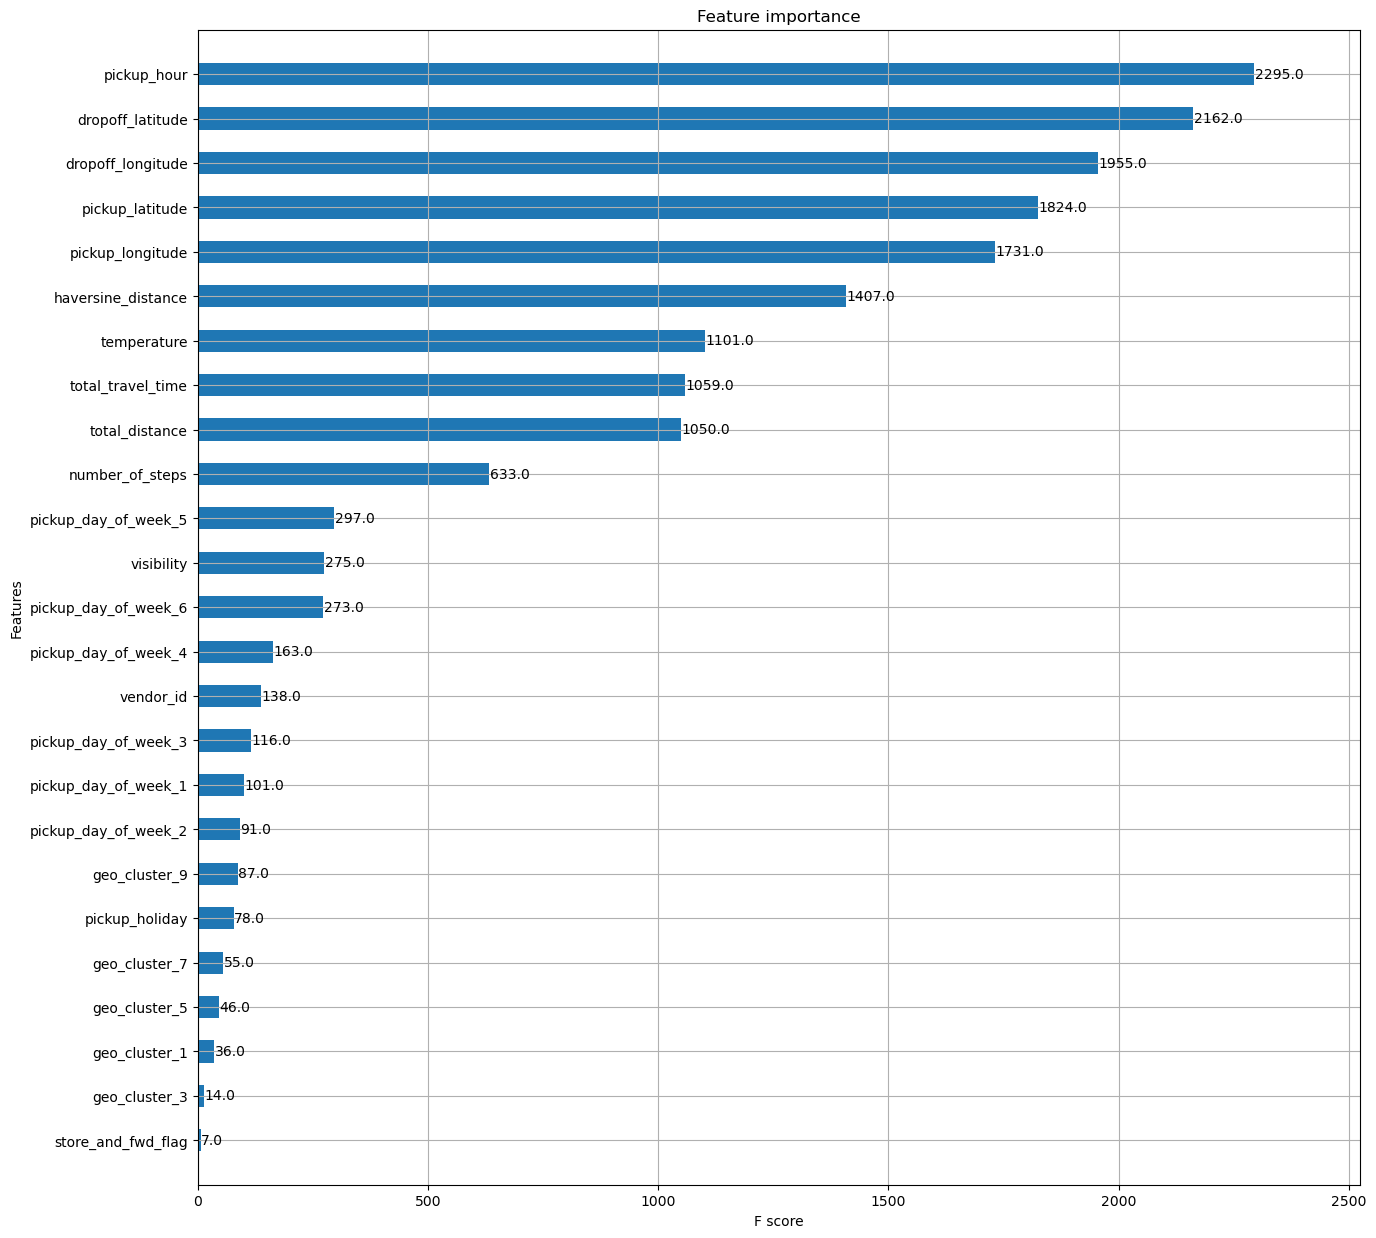

In [328]:
fig, ax = plt.subplots(figsize = (15,15))
xgb.plot_importance(model, ax = ax, height=0.5)